<center><img src="logo_pret_a_depenser.png">


<center> Notebook 2 - Modèles de classification </center>

# 1. Importations

## 1.1 Importations librairies

Importation des librairies utilisées au cours de l'étude : 

In [29]:
###importation des bibliothèques : 
### bibliothèques générales : 
import importlib.metadata
import pandas as pd
import numpy as np
import joblib

### visualisation : 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import set_config

### preprocessing : 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
import warnings
import sklearn
from sklearn import datasets, preprocessing, model_selection, ensemble, pipeline

### labelisation : 
from sklearn.preprocessing import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder

### validation croisée : 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve

###features importance : 
import shap
import lime
from lime import lime_tabular

### Modèles : 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, mean_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier

### PYCARAT : 
#import pycaret
#from pycaret.classification import *

from sklearn.preprocessing import StandardScaler
import gc
import time
import mlflow
import mlflow.sklearn
import optuna
import logging

In [2]:
### Visualisation des versions des librairies utilisées : 
!python --version

print('\nfully imported')
print('\n'.join(f'{m.__name__} - {m.__version__}' 
                for m in globals().values() 
                if getattr(m, '__version__', None)))

print('\npartially imported')
#print("deep_translator -", importlib.metadata.version('deep_translator'))
print("importlib -", importlib.metadata.version('importlib.metadata'))
print("matplotlib -", importlib.metadata.version('matplotlib'))
print("numpy -", importlib.metadata.version('numpy'))

print(f"scikit-learn version: {sklearn.__version__}")

Python 3.12.4

fully imported
json - 2.0.9
numpy - 1.26.4
pandas - 2.1.4
pyspark - 3.5.2
tensorflow - 2.17.0
keras - 3.5.0
ipywidgets - 7.8.1
xarray - 2023.6.0
pandas - 2.1.4
numpy - 1.26.4
seaborn - 0.13.2
missingno - 0.5.2
sklearn - 1.4.2
shap - 0.46.0
mlflow - 2.14.3
optuna - 3.6.1
logging - 0.5.1.2

partially imported
importlib - 7.0.1
matplotlib - 3.7.5
numpy - 1.26.4
scikit-learn version: 1.4.2


## 1.2 Importations jeux de données

Récupération du jeu de données traités dans le notebook Notebook 1 - Exploration du jeu de données :

In [51]:
### Importation du dataset : 
df_encoded = pd.read_csv('../Données/df_encoded.csv')

In [52]:
### Visualisation du dataset et de sa taille : 
print (df_encoded.shape)
df_encoded.head()

(355972, 626)


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,CC_AMT_INSTALMENT_MAX,CC_AMT_INSTALMENT_MEAN,CC_AMT_INSTALMENT_SUM,CC_AMT_INSTALMENT_VAR,CC_AMT_PAYMENT_MIN,CC_AMT_PAYMENT_MAX,CC_AMT_PAYMENT_MEAN,CC_AMT_PAYMENT_SUM,CC_AMT_PAYMENT_VAR,CC_COUNT
0,100002,0,202500,406597,24700,351000,-9461,-637,-3648,-2120,...,53093.0,11558.473684,219611.0,1.011643e+08,9251.0,53093.0,11558.473684,219611.0,1.011643e+08,19.0
1,100003,0,270000,1293502,35698,1129500,-16765,-1188,-1186,-291,...,560835.0,64754.000000,1618850.0,1.221965e+10,6662.0,560835.0,64754.000000,1618850.0,1.221965e+10,25.0
2,100004,0,67500,135000,6750,135000,-19046,-225,-4260,-2531,...,10573.0,7095.666667,21287.0,9.068885e+06,5357.0,10573.0,7095.666667,21287.0,9.068885e+06,3.0
3,100006,0,135000,312682,29686,297000,-19005,-3039,-9833,-2437,...,691786.0,62946.437500,1007143.0,2.825679e+10,2482.0,691786.0,62946.437500,1007143.0,2.825679e+10,16.0
4,100007,0,121500,513000,21865,513000,-19932,-3038,-4311,-3458,...,22678.0,12665.878788,835948.0,6.166609e+07,0.0,22678.0,12213.500000,806091.0,6.476915e+07,66.0


In [53]:
###############################################################################################################################

In [54]:
### Importation d'un dataset plus petit (en terme de nombre de variables) pour des études préliminaires : 
df_petit = pd.read_csv('../Données/df_petit.csv')

In [55]:
### Visualisation du dataset et de sa taille : 
print (df_petit.shape)
df_petit.head()

(355972, 263)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,100002,1.0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,False,False,False,False,True,False,False,True,False,False
1,100003,0.0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,False,False,False,False,False,False,False,True,False,False
2,100004,0.0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,False,False,False,False,False,False,True,False,False,True
3,100006,0.0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,False,False,False,False,False,False,True,False,False,True
4,100007,0.0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,False,False,False,False,False,False,True,False,False,True


In [56]:
# Sélectionner les colonnes de type booléen
bool_columns = df_petit.select_dtypes(include='bool').columns.tolist()

# Afficher la liste des colonnes booléennes
print(bool_columns)

['NAME_CONTRACT_TYPE_Cash loans', 'NAME_CONTRACT_TYPE_Revolving loans', 'NAME_CONTRACT_TYPE_nan', 'CODE_GENDER_F', 'CODE_GENDER_M', 'CODE_GENDER_nan', 'FLAG_OWN_CAR_N', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_CAR_nan', 'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y', 'FLAG_OWN_REALTY_nan', 'NAME_TYPE_SUITE_Children', 'NAME_TYPE_SUITE_Family', 'NAME_TYPE_SUITE_Group of people', 'NAME_TYPE_SUITE_Other_A', 'NAME_TYPE_SUITE_Other_B', 'NAME_TYPE_SUITE_Spouse, partner', 'NAME_TYPE_SUITE_Unaccompanied', 'NAME_TYPE_SUITE_nan', 'NAME_INCOME_TYPE_Businessman', 'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Unemployed', 'NAME_INCOME_TYPE_Working', 'NAME_INCOME_TYPE_nan', 'NAME_EDUCATION_TYPE_Academic degree', 'NAME_EDUCATION_TYPE_Higher education', 'NAME_EDUCATION_TYPE_Incomplete higher', 'NAME_EDUCATION_TYPE_Lower secondary', 'NAME_EDUCATION_TYPE_Secondary / secondary special'

In [57]:
### Visualisation d'une colonne :  
df_petit['NAME_CONTRACT_TYPE_Cash loans']

0          True
1          True
2         False
3          True
4          True
          ...  
355967     True
355968     True
355969     True
355970     True
355971     True
Name: NAME_CONTRACT_TYPE_Cash loans, Length: 355972, dtype: bool

In [58]:
### Importation d'un dataset plus petit pour des études préliminaires (en terme de nombre de variables, mais cette fois encodage correct des variables catégorielles): 
df_petit_encoded = pd.read_csv('../Données/df_petit_encoded.csv')

In [59]:
# Compter les NaN dans une colonne spécifique (par exemple, 'col1')
nan_count_TARGET = df_petit_encoded['TARGET'].isna().sum()
print(f"Nombre de NaN dans TARGET : {nan_count_TARGET}")

Nombre de NaN dans TARGET : 48744


In [60]:
### Visualisation du dataset et de sa taille : 
print (df_petit_encoded.shape)
df_petit_encoded.head()

(355972, 247)


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,100002,0,202500,406597,24700,351000,0,-9461,-637,-3648,...,0,0,0,0,0,1,0,1,0,1.0
1,100003,0,270000,1293502,35698,1129500,0,-16765,-1188,-1186,...,1,0,0,0,0,0,0,1,0,0.0
2,100004,0,67500,135000,6750,135000,0,-19046,-225,-4260,...,0,0,0,0,0,0,0,0,0,0.0
3,100006,0,135000,312682,29686,297000,0,-19005,-3039,-9833,...,0,0,0,0,0,0,0,0,0,0.0
4,100007,0,121500,513000,21865,513000,0,-19932,-3038,-4311,...,0,0,0,0,0,0,0,0,0,0.0


# 2. Modèles de classification

Les étapes ici sont les suivantes : 
- Entraînement Initial du Modèle : entraîner un modèle sur toutes les features pour obtenir les importances des features.

- Sélection des Features Importantes : utiliser les importances des features pour sélectionner les plus pertinentes.

- Optimiser les Hyperparamètres pour chaque Modèle et Stratégie avec les Features Sélectionnées.

- Entraînement Final du Modèle avec les Features Sélectionnées : entraîner et évaluer le modèle sur le dataset réduit.

Dans un premier temps, nous allons préparer notre dataset. 
Puis nous testerons différents paramètres : 
- 3 modèles : 
    - Dummy Regressor : Modèle de régression simple qui prédit la valeur moyenne ou médiane des cibles, utilisé comme référence de base pour évaluer d'autres modèles.
    - Régression logistique : Méthode de classification qui modélise la probabilité qu'un événement se produise, en utilisant une fonction logistique.
    - LightGBM : Algorithme de boosting par gradient optimisé pour la vitesse et l'efficacité, adapté aux grandes quantités de données.
- 2 méthodes d'équilibrage : 
    - ClassWeight : Paramètre utilisé dans les algorithmes de classification pour donner plus d'importance à certaines classes lors de l'entraînement, utile en cas de déséquilibre des classes.
    - SMOTE (Synthetic Minority Over-sampling Technique) : Technique d'oversampling qui génère des exemples synthétiques pour la classe minoritaire afin d'équilibrer la distribution des classes. 
- 2 méthodes de calcul de performances business : 
    - F-beta Score : Mesure de performance d'un modèle qui combine la précision et le rappel, pondérée selon le paramètre β pour donner plus d'importance à l'une ou l'autre.
    - Business Score : Indicateur de performance qui évalue l'impact d'un modèle sur les résultats commerciaux, souvent en fonction des objectifs stratégiques d'une entreprise.

## 2.0 Découpage Dataset

### 2.0.1 Dataset complet encoded

In [13]:
### Définition du jeu de données d'entrainement et de test:
application_train = df_encoded.dropna(subset=['TARGET'])
application_test = df_encoded[df_encoded['TARGET'].isna()]

In [14]:
### Visualisation de la taille des datasets : 
print (application_train.shape)
print (application_test.shape)

(307228, 626)
(48744, 626)


In [16]:
### Visualisation du dataset application_train: 
application_train.head(5)

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,CC_AMT_INSTALMENT_MAX,CC_AMT_INSTALMENT_MEAN,CC_AMT_INSTALMENT_SUM,CC_AMT_INSTALMENT_VAR,CC_AMT_PAYMENT_MIN,CC_AMT_PAYMENT_MAX,CC_AMT_PAYMENT_MEAN,CC_AMT_PAYMENT_SUM,CC_AMT_PAYMENT_VAR,CC_COUNT
0,100002,0,202500,406597,24700,351000,-9461,-637,-3648,-2120,...,53093.0,11558.473684,219611.0,1.011643e+08,9251.0,53093.0,11558.473684,219611.0,1.011643e+08,19.0
1,100003,0,270000,1293502,35698,1129500,-16765,-1188,-1186,-291,...,560835.0,64754.000000,1618850.0,1.221965e+10,6662.0,560835.0,64754.000000,1618850.0,1.221965e+10,25.0
2,100004,0,67500,135000,6750,135000,-19046,-225,-4260,-2531,...,10573.0,7095.666667,21287.0,9.068885e+06,5357.0,10573.0,7095.666667,21287.0,9.068885e+06,3.0
3,100006,0,135000,312682,29686,297000,-19005,-3039,-9833,-2437,...,691786.0,62946.437500,1007143.0,2.825679e+10,2482.0,691786.0,62946.437500,1007143.0,2.825679e+10,16.0
4,100007,0,121500,513000,21865,513000,-19932,-3038,-4311,-3458,...,22678.0,12665.878788,835948.0,6.166609e+07,0.0,22678.0,12213.500000,806091.0,6.476915e+07,66.0


In [17]:
### enregistrement des jeux de données application_train et application_test: 
application_train.to_csv('application_train_encoded.csv', index=False)
application_test.to_csv('application_test_encoded.csv', index=False)

### 2.0.2 Dataset petit

In [29]:
### Définition du jeu de données d'entrainement et de test:
application_train_petit = df_petit.dropna(subset=['TARGET'])
application_test_petit = df_petit[df_petit['TARGET'].isna()]

In [30]:
### Visualisation de la taille des datasets : 
print (application_train_petit.shape)
print (application_test_petit.shape)

(307228, 263)
(48744, 263)


In [33]:
### Remplissage valeur manquante par moyenne : 
application_train_petit_clean = application_train_petit.copy()

# Calculer la moyenne uniquement pour les colonnes numériques
mean_values = application_train_petit.select_dtypes(include=[np.number]).mean()
application_train_petit_clean = application_train_petit.fillna(mean_values)

# Réinitialiser l'index après le dropna pour éviter des indices discontinus
application_train_petit = application_train_petit.dropna(subset=['TARGET']).reset_index(drop=True)
application_test_petit = df_petit[df_petit['TARGET'].isna()].reset_index(drop=True)

#application_train_petit_clean = application_train_petit.fillna(application_train_petit.mean())

In [34]:
### enregistrement des jeux de données : 
application_train_petit.to_csv('application_train_petit.csv', index=False)
application_test_petit.to_csv('application_test_petit.csv', index=False)

AttributeError: 'Index' object has no attribute '_format_native_types'

### 2.0.3 Dataset petit encoded

In [ ]:
### Définition du jeu de données d'entrainement et de test:
application_train_petit_encoded = df_petit_encoded.dropna(subset=['TARGET'])
application_test_petit_encoded = df_petit_encoded[df_petit_encoded['TARGET'].isna()]

In [54]:
### Taille des datasets : 
print (application_train_petit_encoded.shape)
print (application_test_petit_encoded.shape)

(307228, 247)
(48744, 247)


In [55]:
### enregistrement des jeux de données : 
application_train_petit_encoded.to_csv('application_train_petit_encoded.csv', index=False)
application_test_petit_encoded.to_csv('application_test_petit_encoded.csv', index=False)

AttributeError: 'Index' object has no attribute '_format_native_types'

## 2.1 Dummy Regressor

Ce modèle nous sert de référence de base. Il existe plusieurs paramètres que nous pouvons tester dans le Dummy Regressor afin d'essayer de trouver le modèle le plus performant au vue de nos données.
C'est un modèle de régression qui prédit une valeur constante ou une valeur basée sur une stratégie simple, sans tenir compte des caractéristiques des données d'entrée. Par exemple, il peut prédire la moyenne, la médiane, ou une valeur aléatoire de la cible. Son objectif principal est de servir de point de comparaison pour évaluer l'efficacité d'autres modèles plus complexes. En utilisant un Dummy Regressor, on peut déterminer si un modèle plus sophistiqué apporte réellement une amélioration significative par rapport à des prédictions simples.

### 2.1.1 Dataset complet

In [61]:
import mlflow
import mlflow.sklearn  # pour log le modèle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
import gc
import time  # Pour mesurer le temps

In [62]:
### Définition de X et Y : 
# 1. Prétraiter les données
X = application_train.drop(columns=["TARGET", "SK_ID_CURR"])
y = application_train["TARGET"]

In [63]:
# 2. Préparer la Cross-Validation
cv = StratifiedKFold(n_splits=5)

# Hyperparamètres du DummyClassifier
strategies = ['stratified', 'most_frequent', 'prior', 'uniform', 'constant']

results = []

mlflow.set_experiment("DummyClassifier")

for strategy in strategies:
    with mlflow.start_run():
        dummy = DummyClassifier(strategy=strategy, constant=1 if strategy == 'constant' else None)

        # Mesurer le temps de traitement de fit
        start_time_fit = time.time()
        dummy.fit(X, y)
        elapsed_time_fit = time.time() - start_time_fit

        # Mesurer le temps de traitement de prédiction
        start_time_predict = time.time()
        y_prob = cross_val_predict(dummy, X, y, cv=cv, method="predict_proba")[:, 1]
        elapsed_time_predict = time.time() - start_time_predict
        
        y_pred = (y_prob > 0.5)

        # Calcul des scores
        auc = roc_auc_score(y, y_prob)
        acc = accuracy_score(y, y_pred)
        tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
        cost = fp + 10 * fn

        # Log les hyperparamètres, métriques et temps à MLflow
        mlflow.log_param("Strategy", strategy)
        mlflow.log_metric("AUC", auc)
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("Business Score", cost)
        mlflow.log_metric("Fit Time", elapsed_time_fit)
        mlflow.log_metric("Prediction Time", elapsed_time_predict)

        # Log le modèle à MLflow
        mlflow.sklearn.log_model(dummy, "dummy_model")

        # Stockage et log des courbes ROC
        fpr, tpr, thresholds = roc_curve(y, y_prob)
        
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve.png")
        plt.close()
        mlflow.log_artifact("roc_curve.png")
        
        # Ajouter les résultats à la liste
        results.append({
            "Strategy": strategy,
            "AUC": auc,
            "Accuracy": acc,
            "Business Score": cost,
            "Fit Time": elapsed_time_fit,  
            "Prediction Time": elapsed_time_predict  
        })

# Afficher les résultats
results_df = pd.DataFrame(results)

gc.collect()

1194

In [64]:
### Résultat du Dummy : 
styled_df_Dummy = results_df.sort_values(by='Business Score', ascending=True)

In [65]:
### Enregistrement en csv : 
styled_df_Dummy .to_csv('results_Dummy.csv', index=False)

In [66]:
### Visualisation sous forme de tableau des résultats : 
def highlight_max(s):
    '''
    Mettez en surbrillance la valeur maximale d'une série en vert.
    '''
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

def highlight_min(s):
    '''
    Mettez en surbrillance la valeur minimale d'une série en vert.
    '''
    is_min = s == s.min()
    return ['background-color: green' if v else '' for v in is_min]

styled_df_Dummy  = (styled_df_Dummy.style.apply(highlight_max, subset=['AUC', 'Accuracy'])
                          .apply(highlight_min, subset=['Business Score', 'Fit Time', 'Prediction Time'])
                          .format({'Threshold': "{:g}"}))

styled_df_Dummy

,Strategy,AUC,Accuracy,Business Score,Fit Time,Prediction Time
1,most_frequent,0.500000,0.919268,248030,0.009803,2.485085
2,prior,0.499976,0.919268,248030,0.010126,2.409995
3,uniform,0.500000,0.919268,248030,0.009122,2.327354
0,stratified,0.499127,0.851400,251241,0.021964,3.113106
4,constant,0.500000,0.080732,282425,0.016087,2.393276


### 2.1.2 Dataset petit

Comme pour le dataset complet, on va tester le Dummy regressor sur le dataset réduit : 

In [ ]:
### Définition de X et Y : 
# 1. Prétraiter les données
X = application_train_petit_clean.drop(columns=["TARGET", "SK_ID_CURR"])
y = application_train_petit_clean["TARGET"]

In [124]:
# Visualisation du tableau : 
application_train_petit_clean.head()

In [59]:
# 2. Préparer la Cross-Validation
cv = StratifiedKFold(n_splits=5)

# Hyperparamètres du DummyClassifier
strategies = ['stratified', 'most_frequent', 'prior', 'uniform', 'constant']

results = []

mlflow.set_experiment("DummyClassifier")

for strategy in strategies:
    with mlflow.start_run():
        dummy = DummyClassifier(strategy=strategy, constant=1 if strategy == 'constant' else None)

        # Mesurer le temps de traitement de fit
        start_time_fit = time.time()
        dummy.fit(X, y)
        elapsed_time_fit = time.time() - start_time_fit

        # Mesurer le temps de traitement de prédiction
        start_time_predict = time.time()
        y_prob = cross_val_predict(dummy, X, y, cv=cv, method="predict_proba")[:, 1]
        elapsed_time_predict = time.time() - start_time_predict
        
        y_pred = (y_prob > 0.5)

        # Calcul des scores
        auc = roc_auc_score(y, y_prob)
        acc = accuracy_score(y, y_pred)
        tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
        cost = fp + 10 * fn

        # Log les hyperparamètres, métriques et temps à MLflow
        mlflow.log_param("Strategy", strategy)
        mlflow.log_metric("AUC", auc)
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("Business Score", cost)
        mlflow.log_metric("Fit Time", elapsed_time_fit)
        mlflow.log_metric("Prediction Time", elapsed_time_predict)

        # Log le modèle à MLflow
        mlflow.sklearn.log_model(dummy, "dummy_model")

        # Stockage et log des courbes ROC
        fpr, tpr, thresholds = roc_curve(y, y_prob)
        
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve.png")
        plt.close()
        mlflow.log_artifact("roc_curve.png")
        
        # Ajouter les résultats à la liste
        results.append({
            "Strategy": strategy,
            "AUC": auc,
            "Accuracy": acc,
            "Business Score": cost
        })

# Afficher les résultats
results_df = pd.DataFrame(results)

gc.collect()

259

In [96]:
### Résultats du Dummy : 
styled_df_Dummy = results_df.sort_values(by='Business Score', ascending=True)

In [98]:
### Enregistrement en csv : 
styled_df_Dummy .to_csv('results_Dummy.csv', index=False)

In [100]:
### Visualisation des résultats sous forme de tableau : 
def highlight_max(s):
    '''
    Mettez en surbrillance la valeur maximale d'une série en vert.
    '''
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

def highlight_min(s):
    '''
    Mettez en surbrillance la valeur minimale d'une série en vert.
    '''
    is_min = s == s.min()
    return ['background-color: green' if v else '' for v in is_min]

styled_df_Dummy  = (styled_df_Dummy.style.apply(highlight_max, subset=['AUC', 'Accuracy'])
                          .apply(highlight_min, subset=['Business Score'])
                          .format({'Threshold': "{:g}"}))

styled_df_Dummy

,C,Threshold,AUC,Accuracy,Business Score
27,122.465193,0.53,0.747856,0.723782,166996
31,102.430697,0.53,0.747856,0.723837,167033
22,70.949651,0.53,0.747866,0.723752,167041
5,134.291697,0.53,0.747847,0.723762,167056
42,87.214196,0.53,0.747853,0.723811,167068
36,93.172129,0.53,0.747848,0.723808,167069
41,98.929739,0.53,0.747853,0.723759,167075
49,90.057235,0.53,0.747849,0.723762,167083
23,74.703880,0.53,0.747859,0.723788,167084
11,89.549079,0.53,0.747853,0.723775,167088


## 2.2 Regression logistique

C'est une méthode d'analyse qui utilise une fonction logistique pour modéliser la relation entre une ou plusieurs variables indépendantes (features) et une variable dépendante binaire. Elle permet de déterminer comment les variables indépendantes influencent la probabilité de l'événement d'intérêt, en produisant des valeurs de probabilité entre 0 et 1. Si la probabilité prédite dépasse un certain seuil (souvent 0,5), le modèle classe l'observation dans la catégorie positive (par exemple, "succès").

### 2.2.1 Dataset complet

In [67]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import gc
import time
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import optuna
import logging
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter('ignore', ConvergenceWarning)
optuna_logger = logging.getLogger('optuna')
optuna_logger.setLevel(logging.CRITICAL)

start_time = time.time()

# Configuration initiale de MLflow
mlflow.set_experiment('Logistic_Regression')

nb_0 = (application_train['TARGET'] == 0).sum()
nb_1 = (application_train['TARGET'] == 1).sum()

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='mean')  
X = application_train.drop(columns=["TARGET", "SK_ID_CURR"])
X = imputer.fit_transform(X)
y = application_train["TARGET"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

cv = StratifiedKFold(n_splits=5)
class_weights = {0: 1, 1: nb_0 / nb_1}

results = []

total_combinations = 50 

def objective(trial):
    C_val = trial.suggest_float('C_val', 50, 200)
    threshold = trial.suggest_float('threshold', 0.4, 0.6, step=0.01)

    model = LogisticRegression(C=C_val, class_weight=class_weights, verbose=0, max_iter=1000)
    
    # Enregistrement du temps de début pour le fit
    start_fit_time = time.time()
    y_prob = cross_val_predict(model, X, y, cv=cv, method="predict_proba")[:, 1]
    # Calculer le temps de fit
    fit_duration = time.time() - start_fit_time

    # Enregistrement du temps de début pour la prédiction
    start_pred_time = time.time()
    y_pred = y_prob > threshold
    # Calculer le temps de prédiction
    pred_duration = time.time() - start_pred_time

    auc = roc_auc_score(y, y_prob)
    acc = accuracy_score(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    cost = fp + 10 * fn
    
    results.append({
        "C": C_val,
        "Threshold": threshold,
        "AUC": auc,
        "Accuracy": acc,
        "Business Score": cost,
        "Fit Time": elapsed_time_fit,  
        "Prediction Time": elapsed_time_predict 
    })

    with mlflow.start_run():
        mlflow.log_param("C", C_val)
        mlflow.log_param("Threshold", round(threshold, 2))
        mlflow.log_metric("AUC", auc)
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("Business Score", cost)
        
        # Enregistrer les temps dans mlflow
        mlflow.log_metric("Fit Time", fit_duration)
        mlflow.log_metric("Prediction Time", pred_duration)

        fpr, tpr, _ = roc_curve(y, y_prob)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve.png")
        plt.close()
        mlflow.log_artifact("roc_curve.png")

        mlflow.sklearn.log_model(model, "model")
    
    gc.collect()

    return cost

def print_progress(study, trial, total_combinations):
    print(f"Essai {trial.number + 1}/{total_combinations} terminé!", end='\r', flush=True)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=total_combinations, callbacks=[lambda study, trial: print_progress(study, trial, total_combinations)])

results_df = pd.DataFrame(results)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTemps écoulé: {elapsed_time:.2f} secondes")

print(study.best_params)

Essai 50/50 terminé!
Temps écoulé: 3543.14 secondes
{'C_val': 92.19667167960213, 'threshold': 0.52}


In [68]:
### Résultats de la régression logistique : 
styled_df_Log_Reg = results_df.sort_values(by='Business Score', ascending=True)

In [69]:
### Enregistrement des résultats en csv : 
styled_df_Log_Reg .to_csv('results_Log_Reg.csv', index=False)

In [70]:
### Visualisation des résultats sous forme de tableau : 
def highlight_max(s):
    '''
    Mettez en surbrillance la valeur maximale d'une série en vert.
    '''
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

def highlight_min(s):
    '''
    Mettez en surbrillance la valeur minimale d'une série en vert.
    '''
    is_min = s == s.min()
    return ['background-color: green' if v else '' for v in is_min]

styled_df_Log_Reg  = (styled_df_Log_Reg.style.apply(highlight_max, subset=['AUC', 'Accuracy'])
                          .apply(highlight_min, subset=['Business Score', 'Fit Time', 'Prediction Time'])
                          .format({'Threshold': "{:g}", 'Business Score': "{:.0f}"}))

styled_df_Log_Reg 

,C,Threshold,AUC,Accuracy,Business Score,Fit Time,Prediction Time
15,92.196672,0.52,0.740357,0.704614,169303,0.016087,2.393276
9,70.469905,0.54,0.740364,0.728368,169304,0.016087,2.393276
49,105.466713,0.55,0.740363,0.739848,169332,0.016087,2.393276
22,81.125721,0.53,0.740398,0.716354,169350,0.016087,2.393276
37,50.061607,0.54,0.740367,0.728283,169357,0.016087,2.393276
14,87.425036,0.53,0.740363,0.716559,169368,0.016087,2.393276
41,90.832785,0.54,0.740325,0.728482,169377,0.016087,2.393276
32,72.036522,0.53,0.740324,0.716494,169388,0.016087,2.393276
21,96.311294,0.52,0.740353,0.704574,169414,0.016087,2.393276
42,82.265848,0.52,0.740372,0.704555,169420,0.016087,2.393276


#### Feature importance

C'est une technique qui permet d'identifier quelles caractéristiques d'un jeu de données contribuent le plus à la performance d'un modèle prédictif. Elle aide à comprendre quelles variables influencent le plus les résultats, facilitant ainsi l'interprétation du modèle. Des mesures comme l'importance des caractéristiques peuvent être basées sur des algorithmes d'arbres (comme les forêts aléatoires) ou des techniques d'interprétation comme SHAP (SHapley Additive exPlanations) et LIME (Local Interpretable Model-agnostic Explanations). L'importance des caractéristiques est cruciale pour la sélection de variables, la simplification des modèles, et l'interprétation des résultats.

In [71]:
### Meilleurs paramètres pour le modèle : 
study.best_params

{'C_val': 92.19667167960213, 'threshold': 0.52}

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Supposition que df_classification_imputed est déjà défini
nb_0 = len(application_train[application_train["TARGET"] == 0])
nb_1 = len(application_train[application_train["TARGET"] == 1])
class_weights = {0: 1, 1: nb_0 / nb_1}

# Enregistrer les noms des colonnes avant l'imputation
column_names = application_train.drop(columns=["TARGET", "SK_ID_CURR"]).columns

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='mean')  # Vous pouvez utiliser 'median' ou 'constant' selon votre besoin
X = application_train.drop(columns=["TARGET", "SK_ID_CURR"])
X = imputer.fit_transform(X)
y = application_train["TARGET"]

# Convertir le tableau NumPy en DataFrame pandas
X = pd.DataFrame(X, columns=column_names)

# Stockage des noms des colonnes pour utilisation ultérieure
feature_names = X.columns

# Standardisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)  

# Remplacer 'C_val' par 'C'
params = study.best_params.copy()
params['C'] = params.pop('C_val')

# Suppression de 'threshold'
params.pop('threshold', None)

# Instanciation du modèle
clf = LogisticRegression(**params, class_weight=class_weights, max_iter=1000, verbose=1)

# Validation croisée
cv = StratifiedKFold(n_splits=5)
feature_importances = np.zeros(X.shape[1])

for train, test in cv.split(X, y):
    clf.fit(X[train], y.iloc[train])
    # Pour la régression logistique, l'importance des caractéristiques est donnée par les coefficients
    feature_importances += np.abs(clf.coef_[0])

# Moyenne des importances de caractéristiques sur les plis
feature_importances /= 5

# Afficher les importances des caractéristiques
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)

                                              Feature  Importance
4                                     AMT_GOODS_PRICE    0.575097
2                                          AMT_CREDIT    0.535398
617                             CC_AMT_INSTALMENT_VAR    0.513461
622                                CC_AMT_PAYMENT_VAR    0.498326
604                            CC_DAYS_INSTALMENT_MAX    0.389150
..                                                ...         ...
170          ORGANIZATION_TYPE_Business Entity Type 1    0.001751
295                           BURO_STATUS_4_MEAN_MEAN    0.001701
109                                 FLAG_OWN_REALTY_N    0.001655
110                                 FLAG_OWN_REALTY_Y    0.001655
458  PREV_NAME_GOODS_CATEGORY_House Construction_MEAN    0.000000

[624 rows x 2 columns]


In [73]:
# création d'un dataframe avec les features importances : 
df_feature_importances_log_reg = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# Rangement des features importances : 
df_feature_importances_log_reg = df_feature_importances_log_reg.sort_values(by='importance', ascending=False)
df_feature_importances_log_reg["importance"] = (df_feature_importances_log_reg["importance"]/ df_feature_importances_log_reg["importance"].sum())*100

In [74]:
# Enregistrement des features importances : 
df_feature_importances_log_reg.to_csv('df_feature_importances_log_reg.csv', index=False)

In [75]:
# Visualisation des features importances : 
df_feature_importances_log_reg

,feature,importance
4,AMT_GOODS_PRICE,1.992355
2,AMT_CREDIT,1.854821
617,CC_AMT_INSTALMENT_VAR,1.778824
622,CC_AMT_PAYMENT_VAR,1.726389
604,CC_DAYS_INSTALMENT_MAX,1.348164
...,...,...
170,ORGANIZATION_TYPE_Business Entity Type 1,0.006065
295,BURO_STATUS_4_MEAN_MEAN,0.005893
109,FLAG_OWN_REALTY_N,0.005733
110,FLAG_OWN_REALTY_Y,0.005733


In [76]:
Pourcentage_importance_totale = 95

# Organisation du dataframe en ordre décroissant d'importance :
df_sorted = df_feature_importances_log_reg.sort_values(by="importance", ascending=False)

# Calcul de l'importance cumulative : 
df_sorted["cumulative_importance"] = df_sorted["importance"].cumsum()

# Calcul du nombre de features nécessaires pour atteindre 95% de l'importance totale : 
num_features = df_sorted[df_sorted["cumulative_importance"] <= df_sorted["importance"].sum() * Pourcentage_importance_totale/100].shape[0]

num_features

411

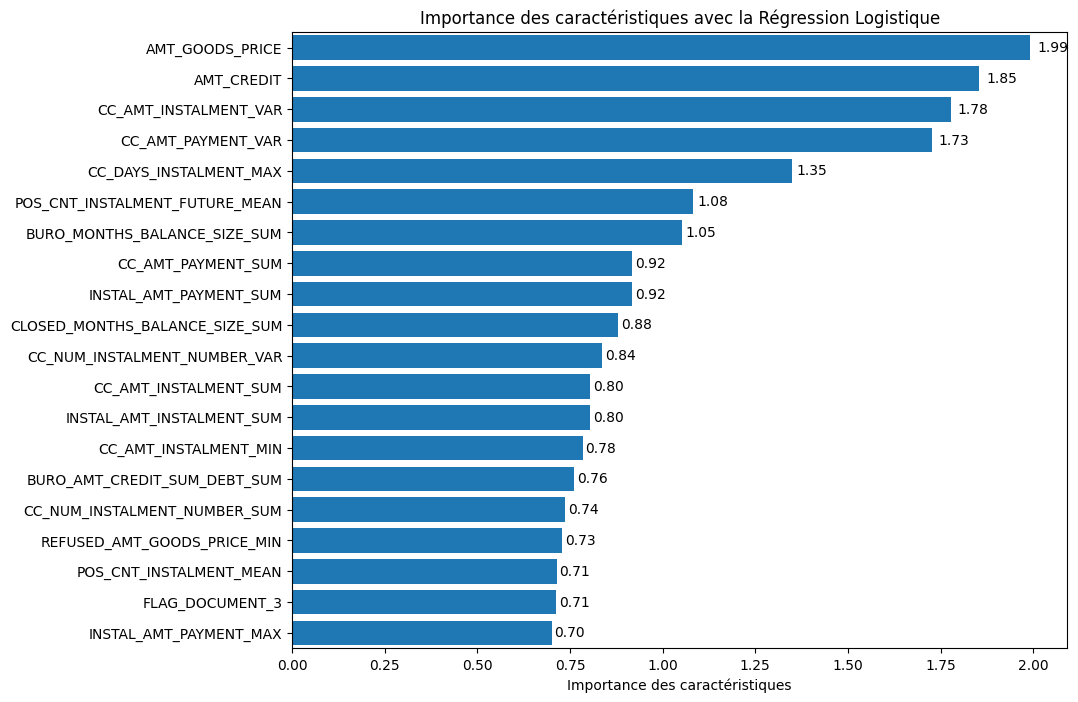

In [77]:
### Visualisation des features importances : 
import numpy as np
import matplotlib.pyplot as plt

# Extraire les colonnes 'feature' et 'importance' de votre dataframe
features = df_feature_importances_log_reg['feature'].to_numpy()
importances = df_feature_importances_log_reg['importance'].to_numpy()

# Création d'un masque pour les importances supérieures à 0
mask = importances > 0

# Filtrage des features et des importances en utilisant le masque
filtered_feature_names = features[mask]
filtered_feature_importances = importances[mask]

# Supposons que vous vouliez afficher les 10 principales caractéristiques
n_features_to_display = 20

# Tri des indices filtrés par importance
sorted_idx = filtered_feature_importances.argsort()

# Limiter aux n principales caractéristiques
top_n_idx = sorted_idx[-n_features_to_display:]

# Affichage de l'importance des caractéristiques filtrées pour les n principales
plt.figure(figsize=(10, len(top_n_idx) * 0.4))
bars = plt.barh(filtered_feature_names[top_n_idx], filtered_feature_importances[top_n_idx])

# Ajuster les limites de l'axe des y pour réduire l'espace autour des barres
plt.ylim(-0.5, len(top_n_idx)-0.5)

plt.xlabel("Importance des caractéristiques")
plt.title("Importance des caractéristiques avec la Régression Logistique")

# Ajouter les valeurs à côté des barres
for bar in bars:
    width = bar.get_width()
    
    # Déterminez le formatage en fonction de la magnitude
    if width < 0.01:
        fmt = '{:.4f}'
    elif width < 0.1:
        fmt = '{:.3f}'
    else:
        fmt = '{:.2f}'
    
    plt.text(width + 0.01 * width,  # Ajouter un padding proportionnel à la valeur
             bar.get_y() + bar.get_height() / 2,
             fmt.format(width),
             va='center', ha='left')

plt.show()

### 2.2.2 Dataset petit

Même structure sur le petit dataset : 

In [71]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import gc
import time
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import optuna
import logging
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter('ignore', ConvergenceWarning)
optuna_logger = logging.getLogger('optuna')
optuna_logger.setLevel(logging.CRITICAL)

start_time = time.time()

# Configuration initiale de MLflow
mlflow.set_experiment('Logistic_Regression')

nb_0 = (application_train_petit_clean['TARGET'] == 0).sum()
nb_1 = (application_train_petit_clean['TARGET'] == 1).sum()

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='mean')  # Vous pouvez utiliser 'median' ou 'constant' selon votre besoin
X = application_train_petit_clean.drop(columns=["TARGET", "SK_ID_CURR"])
X = imputer.fit_transform(X)
y = application_train_petit_clean["TARGET"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

cv = StratifiedKFold(n_splits=5)
class_weights = {0: 1, 1: nb_0 / nb_1}

results = []

total_combinations = 50 

def objective(trial):
    C_val = trial.suggest_float('C_val', 50, 200)
    threshold = trial.suggest_float('threshold', 0.4, 0.6, step=0.01)

    model = LogisticRegression(C=C_val, class_weight=class_weights, verbose=0, max_iter=1000)
    
    # Enregistrement du temps de début pour le fit
    start_fit_time = time.time()
    y_prob = cross_val_predict(model, X, y, cv=cv, method="predict_proba")[:, 1]
    # Calculer le temps de fit
    fit_duration = time.time() - start_fit_time

    # Enregistrement du temps de début pour la prédiction
    start_pred_time = time.time()
    y_pred = y_prob > threshold
    # Calculer le temps de prédiction
    pred_duration = time.time() - start_pred_time

    auc = roc_auc_score(y, y_prob)
    acc = accuracy_score(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    cost = fp + 10 * fn
    
    results.append({
        "C": C_val,
        "Threshold": threshold,
        "AUC": auc,
        "Accuracy": acc,
        "Business Score": cost
    })

    with mlflow.start_run():
        mlflow.log_param("C", C_val)
        mlflow.log_param("Threshold", round(threshold, 2))
        mlflow.log_metric("AUC", auc)
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("Business Score", cost)
        
        # Enregistrer les temps dans mlflow
        mlflow.log_metric("Fit Time", fit_duration)
        mlflow.log_metric("Prediction Time", pred_duration)

        fpr, tpr, _ = roc_curve(y, y_prob)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve.png")
        plt.close()
        mlflow.log_artifact("roc_curve.png")

        mlflow.sklearn.log_model(model, "model")
    
    gc.collect()

    return cost

def print_progress(study, trial, total_combinations):
    print(f"Essai {trial.number + 1}/{total_combinations} terminé!", end='\r', flush=True)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=total_combinations, callbacks=[lambda study, trial: print_progress(study, trial, total_combinations)])

results_df = pd.DataFrame(results)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTemps écoulé: {elapsed_time:.2f} secondes")

print(study.best_params)

Essai 50/50 terminé!
Temps écoulé: 1299.50 secondes
{'C_val': 122.46519294640589, 'threshold': 0.53}


In [76]:
### Résultats de la régression logistique : 
styled_df_Log_Reg = results_df.sort_values(by='Business Score', ascending=True)

In [125]:
### enregistrement des résultats en csv : 
styled_df_Log_Reg .to_csv('results_Log_Reg.csv', index=False)

In [80]:
### Visualisation des résultats : 
def highlight_max(s):
    '''
    Mettez en surbrillance la valeur maximale d'une série en vert.
    '''
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

def highlight_min(s):
    '''
    Mettez en surbrillance la valeur minimale d'une série en vert.
    '''
    is_min = s == s.min()
    return ['background-color: green' if v else '' for v in is_min]

styled_df_Log_Reg  = (styled_df_Log_Reg.style.apply(highlight_max, subset=['AUC', 'Accuracy'])
                          .apply(highlight_min, subset=['Business Score'])
                          .format({'Threshold': "{:g}", 'Business Score': "{:.0f}"}))

styled_df_Log_Reg 

,C,Threshold,AUC,Accuracy,Business Score
27,122.465193,0.53,0.747856,0.723782,166996
31,102.430697,0.53,0.747856,0.723837,167033
22,70.949651,0.53,0.747866,0.723752,167041
5,134.291697,0.53,0.747847,0.723762,167056
42,87.214196,0.53,0.747853,0.723811,167068
36,93.172129,0.53,0.747848,0.723808,167069
41,98.929739,0.53,0.747853,0.723759,167075
49,90.057235,0.53,0.747849,0.723762,167083
23,74.703880,0.53,0.747859,0.723788,167084
11,89.549079,0.53,0.747853,0.723775,167088


#### Feature importance

In [82]:
### Meilleurs paramètres de la régression logistique: 
study.best_params

{'C_val': 122.46519294640589, 'threshold': 0.53}

In [84]:
### Calcul de la feature importance : 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Supposition que df_classification_imputed est déjà défini
nb_0 = len(application_train_petit_clean[application_train_petit_clean["TARGET"] == 0])
nb_1 = len(application_train_petit_clean[application_train_petit_clean["TARGET"] == 1])
class_weights = {0: 1, 1: nb_0 / nb_1}

# Enregistrer les noms des colonnes avant l'imputation
column_names = application_train_petit_clean.drop(columns=["TARGET", "SK_ID_CURR"]).columns

# Imputation des valeurs manquantes
imputer = SimpleImputer(strategy='mean')  # Vous pouvez utiliser 'median' ou 'constant' selon votre besoin
X = application_train_petit_clean.drop(columns=["TARGET", "SK_ID_CURR"])
X = imputer.fit_transform(X)
y = application_train_petit_clean["TARGET"]

# Convertir le tableau NumPy en DataFrame pandas
X = pd.DataFrame(X, columns=column_names)

# Stockage des noms des colonnes pour utilisation ultérieure
feature_names = X.columns

# Standardisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)  

# Remplacer 'C_val' par 'C'
params = study.best_params.copy()
params['C'] = params.pop('C_val')

# Suppression de 'threshold'
params.pop('threshold', None)

# Instanciation du modèle
clf = LogisticRegression(**params, class_weight=class_weights, max_iter=1000, verbose=1)

# Validation croisée
cv = StratifiedKFold(n_splits=5)
feature_importances = np.zeros(X.shape[1])

for train, test in cv.split(X, y):
    clf.fit(X[train], y.iloc[train])
    # Pour la régression logistique, l'importance des caractéristiques est donnée par les coefficients
    feature_importances += np.abs(clf.coef_[0])

# Moyenne des importances de caractéristiques sur les plis
feature_importances /= 5

# Afficher les importances des caractéristiques
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


                            Feature  Importance
29                     EXT_SOURCE_3    0.480069
4                   AMT_GOODS_PRICE    0.460824
28                     EXT_SOURCE_2    0.387003
2                        AMT_CREDIT    0.363860
31                 BASEMENTAREA_AVG    0.244715
..                              ...         ...
181  WEEKDAY_APPR_PROCESS_START_nan    0.000000
147          NAME_FAMILY_STATUS_nan    0.000000
115                FLAG_OWN_CAR_nan    0.000000
154           NAME_HOUSING_TYPE_nan    0.000000
112                 CODE_GENDER_nan    0.000000

[261 rows x 2 columns]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s finished


In [85]:
# création d'un dataframe avec les features importances : 
df_feature_importances_log_reg = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# Rangement des features importances : 
df_feature_importances_log_reg = df_feature_importances_log_reg.sort_values(by='importance', ascending=False)
df_feature_importances_log_reg["importance"] = (df_feature_importances_log_reg["importance"]/ df_feature_importances_log_reg["importance"].sum())*100

In [86]:
### Enregistrement des features importances en csv : 
df_feature_importances_log_reg.to_csv('df_feature_importances_log_reg.csv', index=False)

In [87]:
### Visualisation des features importances : 
df_feature_importances_log_reg

,feature,importance
29,EXT_SOURCE_3,4.638454
4,AMT_GOODS_PRICE,4.452509
28,EXT_SOURCE_2,3.739245
2,AMT_CREDIT,3.515638
31,BASEMENTAREA_AVG,2.364449
...,...,...
181,WEEKDAY_APPR_PROCESS_START_nan,0.000000
147,NAME_FAMILY_STATUS_nan,0.000000
115,FLAG_OWN_CAR_nan,0.000000
154,NAME_HOUSING_TYPE_nan,0.000000


In [88]:
Pourcentage_importance_totale = 95

# Organisation du dataframe en ordre décroissant d'importance :
df_sorted = df_feature_importances_log_reg.sort_values(by="importance", ascending=False)

# Calcul de l'importance cumulative : 
df_sorted["cumulative_importance"] = df_sorted["importance"].cumsum()

# Calcul du nombre de features nécessaires pour atteindre 95% de l'importance totale : 
num_features = df_sorted[df_sorted["cumulative_importance"] <= df_sorted["importance"].sum() * Pourcentage_importance_totale/100].shape[0]

num_features

164

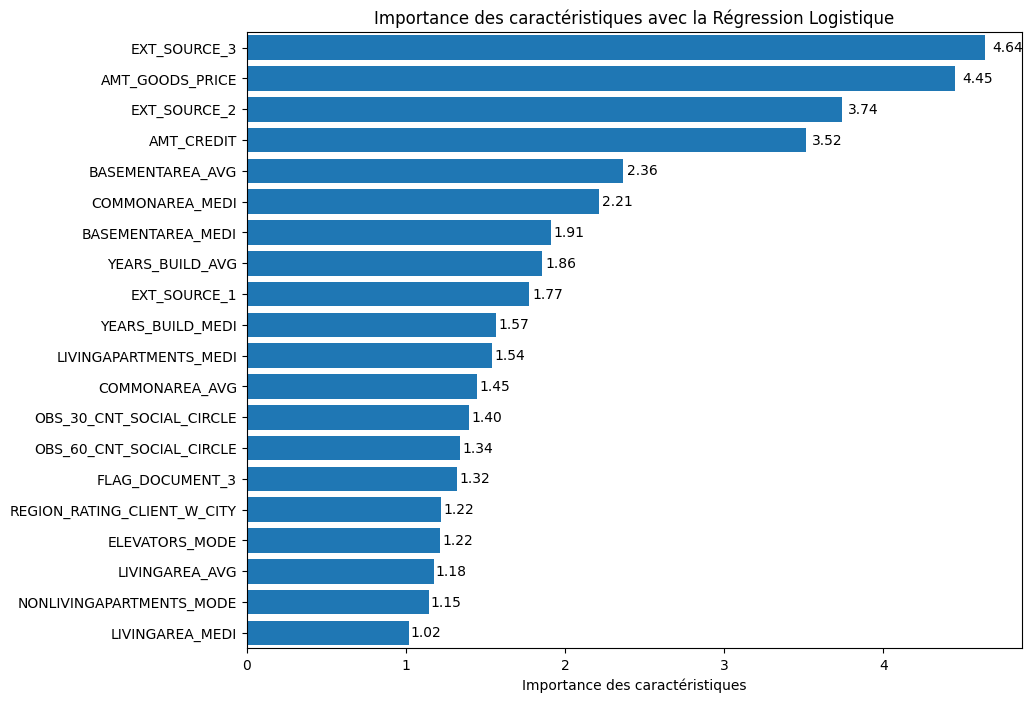

In [89]:
### Visualisation des features importances : 
import numpy as np
import matplotlib.pyplot as plt

# Extraire les colonnes 'feature' et 'importance' de votre dataframe
features = df_feature_importances_log_reg['feature'].to_numpy()
importances = df_feature_importances_log_reg['importance'].to_numpy()

# Création d'un masque pour les importances supérieures à 0
mask = importances > 0

# Filtrage des features et des importances en utilisant le masque
filtered_feature_names = features[mask]
filtered_feature_importances = importances[mask]

# Supposons que vous vouliez afficher les 10 principales caractéristiques
n_features_to_display = 20

# Tri des indices filtrés par importance
sorted_idx = filtered_feature_importances.argsort()

# Limiter aux n principales caractéristiques
top_n_idx = sorted_idx[-n_features_to_display:]

# Affichage de l'importance des caractéristiques filtrées pour les n principales
plt.figure(figsize=(10, len(top_n_idx) * 0.4))
bars = plt.barh(filtered_feature_names[top_n_idx], filtered_feature_importances[top_n_idx])

# Ajuster les limites de l'axe des y pour réduire l'espace autour des barres
plt.ylim(-0.5, len(top_n_idx)-0.5)

plt.xlabel("Importance des caractéristiques")
plt.title("Importance des caractéristiques avec la Régression Logistique")

# Ajouter les valeurs à côté des barres
for bar in bars:
    width = bar.get_width()
    
    # Déterminez le formatage en fonction de la magnitude
    if width < 0.01:
        fmt = '{:.4f}'
    elif width < 0.1:
        fmt = '{:.3f}'
    else:
        fmt = '{:.2f}'
    
    plt.text(width + 0.01 * width,  # Ajouter un padding proportionnel à la valeur
             bar.get_y() + bar.get_height() / 2,
             fmt.format(width),
             va='center', ha='left')

plt.show()

## 2.3 LightGBM

C'est un algorithme d'apprentissage automatique basé sur le principe du gradient boosting, qui construit un modèle en combinant plusieurs arbres de décision. Il est conçu pour être rapide et efficace, notamment avec de grands ensembles de données. LightGBM utilise une approche de "leaf-wise" (par rapport à la méthode "level-wise" utilisée par d'autres algorithmes de boosting), ce qui lui permet de mieux capturer les relations complexes dans les données tout en réduisant le surajustement. Il est également capable de gérer des données avec des caractéristiques catégorielles et de travailler sur des ensembles de données volumineux de manière efficace en termes de mémoire.

### 2.3.1 Dataset complet

In [78]:
### Implémentation du modèle : 
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import gc
import time
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import optuna
import logging

optuna_logger = logging.getLogger('optuna')
optuna_logger.setLevel(logging.CRITICAL)

start_time = time.time()

# Configuration initiale de MLflow
mlflow.set_experiment('LightGBM')

# Supposition : vous avez déjà votre dataframe 'df_classification' chargé
nb_0 = (application_train['TARGET'] == 0).sum()
nb_1 = (application_train['TARGET'] == 1).sum()

X = application_train.drop(columns=["TARGET", "SK_ID_CURR"])
#X = application_train.drop(columns=["TARGET"])
y = application_train["TARGET"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

cv = StratifiedKFold(n_splits=5)
class_weights = {0: 1, 1: nb_0 / nb_1}

results = []

total_combinations = 50  # définissez cela avant d'appeler study.optimize()

def objective(trial):
    lr = trial.suggest_float('lr', 0.001, 0.1, log=True)
    num_leaves = trial.suggest_int('num_leaves', 31, 70)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, log=True)
    threshold = trial.suggest_float('threshold', 0.4, 0.6, step=0.01)

    model = LGBMClassifier(learning_rate=lr, num_leaves=num_leaves, n_estimators=n_estimators, class_weight=class_weights, verbose=-1)
    
    # Enregistrement du temps de début pour le fit
    start_fit_time = time.time()
    y_prob = cross_val_predict(model, X, y, cv=cv, method="predict_proba")[:, 1]
    # Calculer le temps de fit
    fit_duration = time.time() - start_fit_time

    # Enregistrement du temps de début pour la prédiction
    start_pred_time = time.time()
    y_pred = y_prob > threshold
    # Calculer le temps de prédiction
    pred_duration = time.time() - start_pred_time

    auc = roc_auc_score(y, y_prob)
    acc = accuracy_score(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    cost = fp + 10 * fn
    
    results.append({
        "Learning Rate": lr,
        "Num Leaves": num_leaves,
        "Threshold": threshold,
        "AUC": auc,
        "Accuracy": acc,
        "Business Score": cost,
        "Fit Time": fit_duration,  
        "Prediction Time": pred_duration
    })

    with mlflow.start_run():
        mlflow.log_param("Learning Rate", lr)
        mlflow.log_param("Num Leaves", num_leaves)
        mlflow.log_param("N Estimators", n_estimators) 
        mlflow.log_param("Threshold", round(threshold, 2))
        mlflow.log_metric("AUC", auc)
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("Business Score", cost)
        
        # Enregistrer les temps dans mlflow
        mlflow.log_metric("Fit Time", fit_duration)
        mlflow.log_metric("Prediction Time", pred_duration)

        fpr, tpr, _ = roc_curve(y, y_prob)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve.png")
        plt.close()
        mlflow.log_artifact("roc_curve.png")

        mlflow.sklearn.log_model(model, "model")
    
    gc.collect()

    return cost

def print_progress(study, trial, total_combinations):
    print(f"Essai {trial.number + 1}/{total_combinations} terminé!", end='\r', flush=True)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=total_combinations, callbacks=[lambda study, trial: print_progress(study, trial, total_combinations)])

# 6. Afficher les résultats
results_df = pd.DataFrame(results)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTemps écoulé: {elapsed_time:.2f} secondes")

print(study.best_params)

Essai 50/50 terminé!
Temps écoulé: 11248.51 secondes
{'lr': 0.009047806551462997, 'num_leaves': 35, 'n_estimators': 255, 'threshold': 0.51}


In [79]:
### Résultats du LightGBM : 
styled_df_LGM = results_df.sort_values(by='Business Score', ascending=True)

In [80]:
### enregistrement des résultats : 
styled_df_LGM.to_csv('results_LGM.csv', index=False)

In [81]:
### Visualisation des résultats : 
def highlight_max(s):
    '''
    Mettez en surbrillance la valeur maximale d'une série en vert.
    '''
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

def highlight_min(s):
    '''
    Mettez en surbrillance la valeur minimale d'une série en vert.
    '''
    is_min = s == s.min()
    return ['background-color: green' if v else '' for v in is_min]

styled_df_LGM = (styled_df_LGM.style.apply(highlight_max, subset=['AUC', 'Accuracy'])
                          .apply(highlight_min, subset=['Business Score','Fit Time', 'Prediction Time'])
                          .format({'Threshold': "{:g}"}))

styled_df_LGM

,Learning Rate,Num Leaves,Threshold,AUC,Accuracy,Business Score,Fit Time,Prediction Time
35,0.009048,35,0.51,0.732476,0.703950,172450,159.075882,0.000000
44,0.007732,54,0.53,0.730996,0.744369,174810,180.431193,0.000000
45,0.007872,56,0.54,0.731637,0.762336,176220,186.001184,0.000000
19,0.008818,45,0.45,0.728763,0.638470,177366,226.762026,0.000000
21,0.008213,43,0.45,0.732829,0.620246,177367,223.134272,0.000000
18,0.008638,43,0.45,0.732732,0.618837,177521,217.249804,0.000000
17,0.009144,45,0.45,0.726178,0.646100,177911,212.312615,0.000000
36,0.007074,34,0.51,0.720405,0.696161,178245,133.893025,0.000000
10,0.022410,59,0.49,0.682863,0.766864,178663,297.169899,0.000000
41,0.009489,42,0.46,0.720458,0.674916,178688,232.291234,0.000000


#### Feature importance

In [82]:
### Meilleurs paramètres du modèle : 
study.best_params

{'lr': 0.009047806551462997,
 'num_leaves': 35,
 'n_estimators': 255,
 'threshold': 0.51}

In [83]:
### Feature importance : 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Supposition que df_classification_imputed est déjà défini
nb_0 = len(application_train[application_train["TARGET"] == 0])
nb_1 = len(application_train[application_train["TARGET"] == 1])
class_weights = {0: 1, 1: nb_0 / nb_1}

X = application_train.drop(columns=["TARGET", "SK_ID_CURR"])
y = application_train["TARGET"]

# Stockage des noms des colonnes pour utilisation ultérieure
feature_names = X.columns

# Standardisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)  

# Instanciation du modèle
clf = LGBMClassifier(**study.best_params, class_weight=class_weights, verbose=1)

# Validation croisée
cv = StratifiedKFold(n_splits=5)
feature_importances = np.zeros(X.shape[1])

for train, test in cv.split(X, y):
    clf.fit(X[train], y.iloc[train])
    feature_importances += clf.feature_importances_

# Moyenne des importances de caractéristiques sur les plis
feature_importances /= 5

[LightGBM] [Warning] Unknown parameter: lr
[LightGBM] [Warning] Unknown parameter: threshold
[LightGBM] [Warning] Unknown parameter: lr
[LightGBM] [Warning] Unknown parameter: threshold
[LightGBM] [Info] Number of positive: 19842, number of negative: 225940
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,399003 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66924
[LightGBM] [Info] Number of data points in the train set: 245782, number of used features: 614
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,499995 -> initscore=-0,000020
[LightGBM] [Info] Start training from score -0,000020
[LightGBM] [Warning] Unknown parameter: lr
[LightGBM] [Warning] Unknown parameter: threshold
[LightGBM] [Warning] Unknown parameter: lr
[LightGBM] [Warning] Unknown parameter: threshold
[LightGBM] [Info] Number of positive: 19842, number of negative: 225940
[LightGBM] [Info] Auto-choosing col-wise multi-threading, 

In [84]:
### Création d'un dataframe pour les features importances : 
df_feature_importances_lightGBM = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# Réorganisation des features importances en ordre croissant :
df_feature_importances_lightGBM = df_feature_importances_lightGBM.sort_values(by='importance', ascending=False)
df_feature_importances_lightGBM["importance"] = (df_feature_importances_lightGBM["importance"]/ df_feature_importances_lightGBM["importance"].sum())*100

In [85]:
### Enregistrement de la feature importance en csv :
df_feature_importances_lightGBM.to_csv('df_feature_importances_lightGBM.csv', index=False)

In [86]:
### Visualisation de la feature importance : 
df_feature_importances_lightGBM

,feature,importance
5,DAYS_BIRTH,1.647059
3,AMT_ANNUITY,1.372549
73,DAYS_LAST_PHONE_CHANGE,1.358708
575,POS_CNT_INSTALMENT_FUTURE_MEAN,1.227220
8,DAYS_ID_PUBLISH,1.183391
...,...,...
185,ORGANIZATION_TYPE_Industry: type 13,0.000000
186,ORGANIZATION_TYPE_Industry: type 2,0.000000
187,ORGANIZATION_TYPE_Industry: type 3,0.000000
458,PREV_NAME_GOODS_CATEGORY_House Construction_MEAN,0.000000


In [87]:
Pourcentage_importance_totale = 95

# Organisation du dataframe en ordre décroissant d'importance :
df_sorted = df_feature_importances_lightGBM.sort_values(by="importance", ascending=False)

# Calcul de l'importance cumulative : 
df_sorted["cumulative_importance"] = df_sorted["importance"].cumsum()

# Calcul du nombre de features nécessaires pour atteindre 95% de l'importance totale : 
num_features = df_sorted[df_sorted["cumulative_importance"] <= df_sorted["importance"].sum() * Pourcentage_importance_totale/100].shape[0]

num_features

297

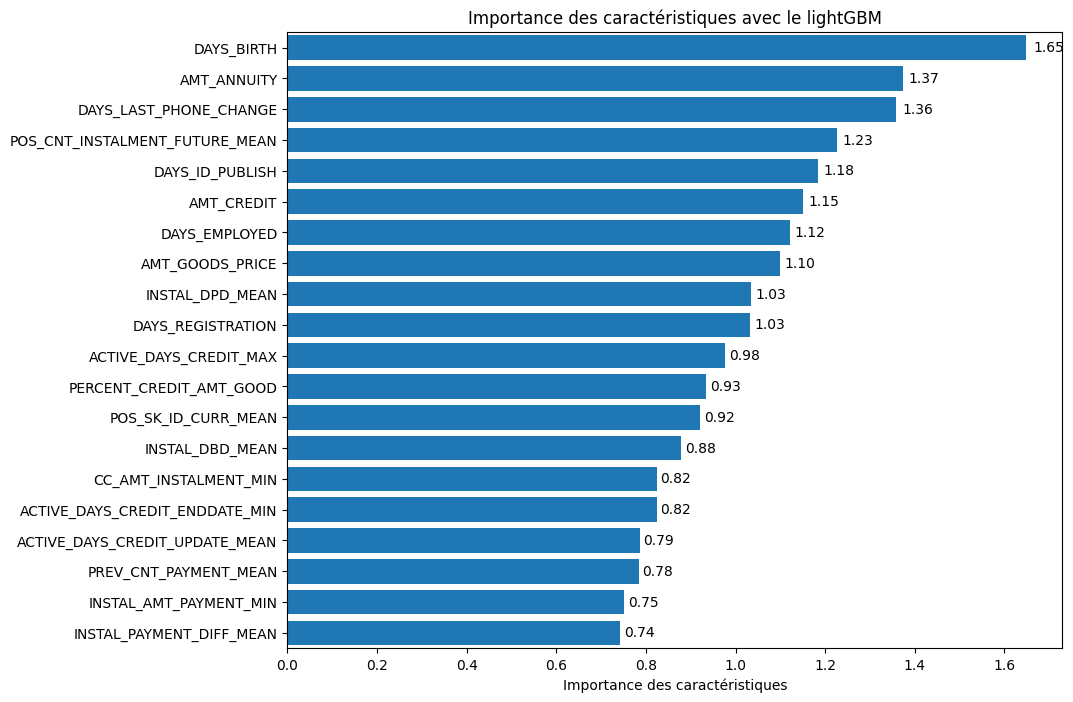

In [88]:
### Visualisation des features importances : 
import numpy as np
import matplotlib.pyplot as plt

# Extraire les colonnes 'feature' et 'importance' de votre dataframe
features = df_feature_importances_lightGBM['feature'].to_numpy()
importances = df_feature_importances_lightGBM['importance'].to_numpy()

# Création d'un masque pour les importances supérieures à 0
mask = importances > 0

# Filtrage des features et des importances en utilisant le masque
filtered_feature_names = features[mask]
filtered_feature_importances = importances[mask]

# Afficher les 10 principales caractéristiques
n_features_to_display = 20

# Tri des indices filtrés par importance
sorted_idx = filtered_feature_importances.argsort()

# Limiter aux n principales caractéristiques
top_n_idx = sorted_idx[-n_features_to_display:]

# Affichage de l'importance des caractéristiques filtrées pour les n principales
plt.figure(figsize=(10, len(top_n_idx) * 0.4))
bars = plt.barh(filtered_feature_names[top_n_idx], filtered_feature_importances[top_n_idx])

# Ajuster les limites de l'axe des y pour réduire l'espace autour des barres
plt.ylim(-0.5, len(top_n_idx)-0.5)

plt.xlabel("Importance des caractéristiques")
plt.title("Importance des caractéristiques avec le lightGBM")

# Ajouter les valeurs à côté des barres
for bar in bars:
    width = bar.get_width()
    
    # Déterminez le formatage en fonction de la magnitude
    if width < 0.01:
        fmt = '{:.4f}'
    elif width < 0.1:
        fmt = '{:.3f}'
    else:
        fmt = '{:.2f}'
    
    plt.text(width + 0.01 * width,  # Ajouter un padding proportionnel à la valeur
             bar.get_y() + bar.get_height() / 2,
             fmt.format(width),
             va='center', ha='left')

plt.show()

#### Réduction du nombre de variables du dataset complet

Le nombre de features du dataset complet est trop grand et risque de poser des soucis en terme de temps de traitement sur le dashboard. On va donc réduire ce dataset en prenant les 60 features qui impactent le plus le modèle.

In [51]:
# Chargement des importances des caractéristiques
df_feature_importances_lightGBM = pd.read_csv('df_feature_importances_lightGBM.csv')

# Chargement du dataset original
application_train = pd.read_csv('../Données/df_encoded.csv')

# Déterminer les 60 caractéristiques les plus importantes plus la colonne 'TARGET'
top_features = df_feature_importances_lightGBM.head(60)['feature'].tolist()

# Ajouter des colonnes TARGET et SK_ID_CURR à la liste des colonnes à conserver
top_features.append('TARGET')
top_features.append('SK_ID_CURR')

# Filtrer le DataFrame original pour conserver uniquement ces caractéristiques
dataset_complet_light = application_train[top_features]

# Sauvegarder le nouveau DataFrame
dataset_complet_light.to_csv('dataset_complet_light.csv', index=False)

In [52]:
### Visualisation et taille du dataset réduit : 
print(dataset_complet_light.shape)
dataset_complet_light.head()

(355972, 62)


,DAYS_BIRTH,AMT_ANNUITY,DAYS_LAST_PHONE_CHANGE,POS_CNT_INSTALMENT_FUTURE_MEAN,DAYS_ID_PUBLISH,AMT_CREDIT,DAYS_EMPLOYED,AMT_GOODS_PRICE,INSTAL_DPD_MEAN,DAYS_REGISTRATION,...,PREV_AMT_DOWN_PAYMENT_MEAN,BURO_AMT_CREDIT_SUM_DEBT_MEAN,APPROVED_AMT_ANNUITY_MEAN,CC_NUM_INSTALMENT_VERSION_VAR,PREV_AMT_ANNUITY_MEAN,PREV_HOUR_APPR_PROCESS_START_MEAN,CC_NUM_INSTALMENT_VERSION_MEAN,ACTIVE_DAYS_CREDIT_ENDDATE_MEAN,TARGET,SK_ID_CURR
0,-9461,24700,-1134,15.000000,-2120,406597,-637,351000,0.000000,-3648,...,0.000000,30722.625,9251.000000,0.052632,9251.000000,9.000000,1.052632,225.0,1.0,100002
1,-16765,35698,-828,5.785714,-291,1293502,-1188,1129500,0.000000,-1186,...,2841.000000,0.000,56553.333333,0.040000,56553.333333,14.666667,1.040000,1216.0,0.0,100003
2,-19046,6750,-815,2.250000,-2531,135000,-225,135000,0.000000,-4260,...,4860.000000,0.000,5357.000000,0.333333,5357.000000,5.000000,1.333333,NaN,0.0,100004
3,-19005,29686,-617,8.571429,-2437,312682,-3039,297000,0.000000,-9833,...,9016.222222,NaN,21841.800000,0.116667,19517.222222,14.666667,1.125000,NaN,0.0,100006
4,-19932,21865,-1106,8.969697,-3458,513000,-3038,513000,0.954545,-4311,...,2222.166667,0.000,12278.166667,0.141026,12278.166667,12.333333,1.166667,NaN,0.0,100007


In [53]:
### Définition du jeu de données d'entrainement et de test:
application_train_light = dataset_complet_light.dropna(subset=['TARGET'])
application_test_light = dataset_complet_light[dataset_complet_light['TARGET'].isna()]

In [54]:
### enregistrement des jeux de données : 
application_train_light.to_csv('application_train_light.csv', index=False)
application_test_light.to_csv('application_test_light.csv', index=False)

In [55]:
### on refait tourner le modèle et on voit ses performances : 
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import gc
import time
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import optuna
import logging

optuna_logger = logging.getLogger('optuna')
optuna_logger.setLevel(logging.CRITICAL)

start_time = time.time()

# Configuration initiale de MLflow
mlflow.set_experiment('LightGBM')

# Supposition : vous avez déjà votre dataframe 'df_classification' chargé
nb_0 = (application_train_light['TARGET'] == 0).sum()
nb_1 = (application_train_light['TARGET'] == 1).sum()

X = application_train_light.drop(columns=["TARGET", "SK_ID_CURR"])
#X = application_train_light.drop(columns=["TARGET"])
y = application_train_light["TARGET"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

cv = StratifiedKFold(n_splits=5)
class_weights = {0: 1, 1: nb_0 / nb_1}

results = []

total_combinations = 50  

def objective(trial):
    lr = trial.suggest_float('lr', 0.001, 0.1, log=True)
    num_leaves = trial.suggest_int('num_leaves', 31, 70)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, log=True)
    threshold = trial.suggest_float('threshold', 0.4, 0.6, step=0.01)

    model = LGBMClassifier(learning_rate=lr, num_leaves=num_leaves, n_estimators=n_estimators, class_weight=class_weights, verbose=-1)
    
    # Enregistrement du temps de début pour le fit
    start_fit_time = time.time()
    y_prob = cross_val_predict(model, X, y, cv=cv, method="predict_proba")[:, 1]
    # Calculer le temps de fit
    fit_duration = time.time() - start_fit_time

    # Enregistrement du temps de début pour la prédiction
    start_pred_time = time.time()
    y_pred = y_prob > threshold
    # Calculer le temps de prédiction
    pred_duration = time.time() - start_pred_time

    auc = roc_auc_score(y, y_prob)
    acc = accuracy_score(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    cost = fp + 10 * fn
    
    results.append({
        "Learning Rate": lr,
        "Num Leaves": num_leaves,
        "Threshold": threshold,
        "AUC": auc,
        "Accuracy": acc,
        "Business Score": cost,
        "Fit Time": fit_duration,  
        "Prediction Time": pred_duration
    })

    with mlflow.start_run():
        mlflow.log_param("Learning Rate", lr)
        mlflow.log_param("Num Leaves", num_leaves)
        mlflow.log_param("N Estimators", n_estimators) 
        mlflow.log_param("Threshold", round(threshold, 2))
        mlflow.log_metric("AUC", auc)
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("Business Score", cost)
        
        # Enregistrer les temps dans mlflow
        mlflow.log_metric("Fit Time", fit_duration)
        mlflow.log_metric("Prediction Time", pred_duration)

        fpr, tpr, _ = roc_curve(y, y_prob)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve.png")
        plt.close()
        mlflow.log_artifact("roc_curve.png")

        mlflow.sklearn.log_model(model, "model")
    
    gc.collect()

    return cost

def print_progress(study, trial, total_combinations):
    print(f"Essai {trial.number + 1}/{total_combinations} terminé!", end='\r', flush=True)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=total_combinations, callbacks=[lambda study, trial: print_progress(study, trial, total_combinations)])

# 6. Afficher les résultats
results_df = pd.DataFrame(results)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTemps écoulé: {elapsed_time:.2f} secondes")

print(study.best_params)

Essai 50/50 terminé!
Temps écoulé: 3032.91 secondes
{'lr': 0.003239940187366094, 'num_leaves': 53, 'n_estimators': 644, 'threshold': 0.52}


In [56]:
### Meilleurs paramètres du modèle : 
best_params = study.best_params
print("Meilleurs paramètres trouvés :", best_params)

Meilleurs paramètres trouvés : {'lr': 0.003239940187366094, 'num_leaves': 53, 'n_estimators': 644, 'threshold': 0.52}


In [116]:
### Résultats du Light GBM :
styled_df_LGM_light = results_df.sort_values(by='Business Score', ascending=True)

In [58]:
### Enregistrement des résultats en csv : 
styled_df_LGM_light.to_csv('results_LGM_light.csv', index=False)

In [59]:
### Visualisation des résultats : 
def highlight_max(s):
    '''
    Mettez en surbrillance la valeur maximale d'une série en vert.
    '''
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

def highlight_min(s):
    '''
    Mettez en surbrillance la valeur minimale d'une série en vert.
    '''
    is_min = s == s.min()
    return ['background-color: green' if v else '' for v in is_min]

styled_df_LGM_light = (styled_df_LGM_light.style.apply(highlight_max, subset=['AUC', 'Accuracy'])
                          .apply(highlight_min, subset=['Business Score','Fit Time', 'Prediction Time'])
                          .format({'Threshold': "{:g}"}))

styled_df_LGM_light

,Learning Rate,Num Leaves,Threshold,AUC,Accuracy,Business Score,Fit Time,Prediction Time
38,0.003240,53,0.52,0.719120,0.726828,179668,71.724224,0.000000
42,0.002386,54,0.51,0.716098,0.687480,180174,79.341250,0.000000
21,0.006210,65,0.47,0.717779,0.637891,180775,43.490074,0.000000
32,0.004508,68,0.47,0.720201,0.618690,180860,54.717616,0.000000
11,0.004876,64,0.48,0.712838,0.675537,181854,59.952713,0.000000
41,0.002218,63,0.49,0.714419,0.635590,182571,81.396919,0.000000
10,0.005214,61,0.47,0.711411,0.658537,182595,56.845132,0.000000
12,0.004762,64,0.46,0.719483,0.599822,182706,52.800808,0.000000
47,0.005924,55,0.51,0.712562,0.728010,182806,49.028347,0.000000
20,0.012949,70,0.53,0.716459,0.759137,182900,22.375793,0.000000


In [60]:
### feature importance : 
study.best_params

{'lr': 0.003239940187366094,
 'num_leaves': 53,
 'n_estimators': 644,
 'threshold': 0.52}

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Supposition que df_classification_imputed est déjà défini
nb_0 = len(application_train_light[application_train_light["TARGET"] == 0])
nb_1 = len(application_train_light[application_train_light["TARGET"] == 1])
class_weights = {0: 1, 1: nb_0 / nb_1}

X = application_train_light.drop(columns=["TARGET", "SK_ID_CURR"])
y = application_train_light["TARGET"]

# Stockage des noms des colonnes pour utilisation ultérieure
feature_names = X.columns

# Standardisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)  

# Instanciation du modèle
clf = LGBMClassifier(**study.best_params, class_weight=class_weights, verbose=1)

# Validation croisée
cv = StratifiedKFold(n_splits=5)
feature_importances = np.zeros(X.shape[1])

for train, test in cv.split(X, y):
    clf.fit(X[train], y.iloc[train])
    feature_importances += clf.feature_importances_

# Moyenne des importances de caractéristiques sur les plis
feature_importances /= 5

[LightGBM] [Warning] Unknown parameter: lr
[LightGBM] [Warning] Unknown parameter: threshold
[LightGBM] [Warning] Unknown parameter: lr
[LightGBM] [Warning] Unknown parameter: threshold
[LightGBM] [Info] Number of positive: 19842, number of negative: 225940
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14451
[LightGBM] [Info] Number of data points in the train set: 245782, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499995 -> initscore=-0.000020
[LightGBM] [Info] Start training from score -0.000020
[LightGBM] [Warning] Unknown parameter: lr
[LightGBM] [Warning] Unknown parameter: threshold
[LightGBM] [Warning] Unknown parameter: lr
[LightGBM] [Warning] Unknown parameter: threshold
[LightGBM] [Info] Number of positive: 19842, number of negative: 225940
[LightGBM] [Info] Auto-choosing col-wise multi-threading, t

In [62]:
### Création d'un dataframe pour les features importances : 
df_feature_importances_lightGBM_light = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

### Organisation des features importances dans l'ordre croissant : 
df_feature_importances_lightGBM_light = df_feature_importances_lightGBM_light.sort_values(by='importance', ascending=False)
df_feature_importances_lightGBM_light["importance"] = (df_feature_importances_lightGBM_light["importance"]/ df_feature_importances_lightGBM_light["importance"].sum())*100

In [63]:
### Enregistrement des features importances en csv : 
df_feature_importances_lightGBM_light.to_csv('df_feature_importances_lightGBM_light.csv', index=False)

In [64]:
Pourcentage_importance_totale = 95

# Organisation du dataframe en ordre décroissant d'importance :
df_sorted = df_feature_importances_lightGBM_light.sort_values(by="importance", ascending=False)

# Calcul de l'importance cumulative : 
df_sorted["cumulative_importance"] = df_sorted["importance"].cumsum()

# Calcul du nombre de features nécessaires pour atteindre 95% de l'importance totale : 
num_features = df_sorted[df_sorted["cumulative_importance"] <= df_sorted["importance"].sum() * Pourcentage_importance_totale/100].shape[0]

num_features

54

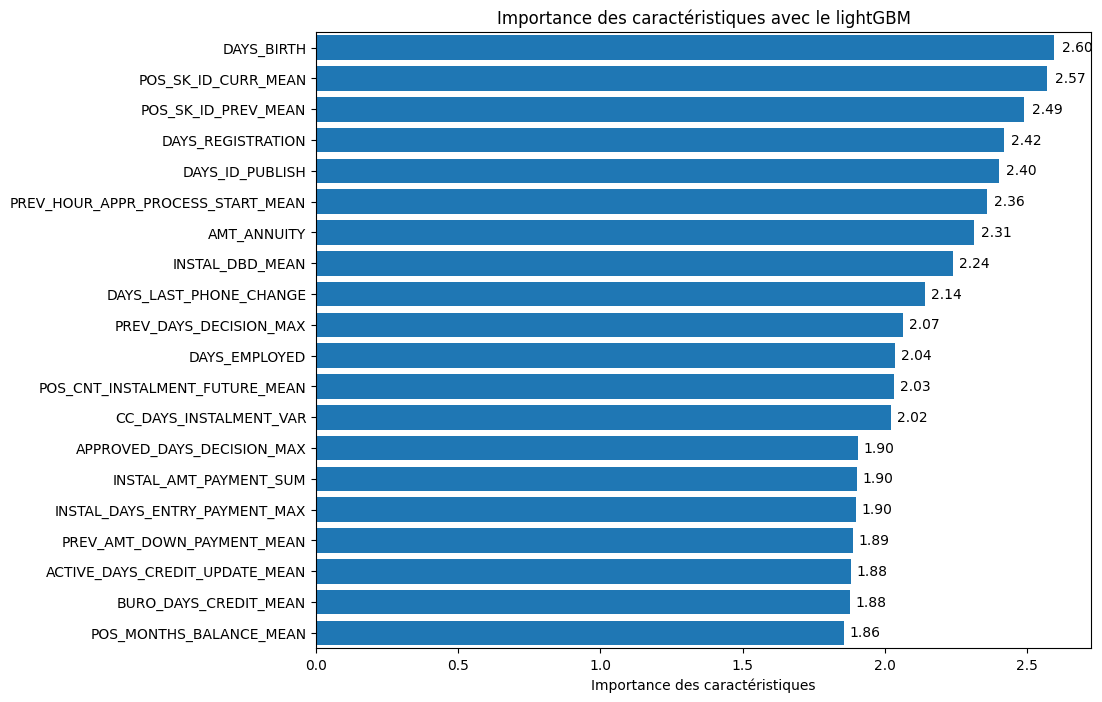

In [65]:
### Visualisation des features importances : 
import numpy as np
import matplotlib.pyplot as plt

# Extraire les colonnes 'feature' et 'importance' de votre dataframe
features = df_feature_importances_lightGBM_light['feature'].to_numpy()
importances = df_feature_importances_lightGBM_light['importance'].to_numpy()

# Création d'un masque pour les importances supérieures à 0
mask = importances > 0

# Filtrage des features et des importances en utilisant le masque
filtered_feature_names = features[mask]
filtered_feature_importances = importances[mask]

# Afficher les 10 principales caractéristiques
n_features_to_display = 20

# Tri des indices filtrés par importance
sorted_idx = filtered_feature_importances.argsort()

# Limiter aux n principales caractéristiques
top_n_idx = sorted_idx[-n_features_to_display:]

# Affichage de l'importance des caractéristiques filtrées pour les n principales
plt.figure(figsize=(10, len(top_n_idx) * 0.4))
bars = plt.barh(filtered_feature_names[top_n_idx], filtered_feature_importances[top_n_idx])

# Ajuster les limites de l'axe des y pour réduire l'espace autour des barres
plt.ylim(-0.5, len(top_n_idx)-0.5)

plt.xlabel("Importance des caractéristiques")
plt.title("Importance des caractéristiques avec le lightGBM")

# Ajouter les valeurs à côté des barres
for bar in bars:
    width = bar.get_width()
    
    # Déterminez le formatage en fonction de la magnitude
    if width < 0.01:
        fmt = '{:.4f}'
    elif width < 0.1:
        fmt = '{:.3f}'
    else:
        fmt = '{:.2f}'
    
    plt.text(width + 0.01 * width,  # Ajouter un padding proportionnel à la valeur
             bar.get_y() + bar.get_height() / 2,
             fmt.format(width),
             va='center', ha='left')

plt.show()

### 2.3.2 Dataset petit

On applique la même logique sur le dataset réduit : 

In [106]:
### Implémentation du modèle : 
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import gc
import time
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import optuna
import logging

optuna_logger = logging.getLogger('optuna')
optuna_logger.setLevel(logging.CRITICAL)

start_time = time.time()

# Configuration initiale de MLflow
mlflow.set_experiment('LightGBM')

# Classification : 
nb_0 = (application_train_petit_clean['TARGET'] == 0).sum()
nb_1 = (application_train_petit_clean['TARGET'] == 1).sum()

X = application_train_petit_clean.drop(columns=["TARGET", "SK_ID_CURR"])
y = application_train_petit_clean["TARGET"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

cv = StratifiedKFold(n_splits=5)
class_weights = {0: 1, 1: nb_0 / nb_1}

results = []

total_combinations = 50  # définissez cela avant d'appeler study.optimize()

def objective(trial):
    lr = trial.suggest_float('lr', 0.001, 0.1, log=True)
    num_leaves = trial.suggest_int('num_leaves', 31, 70)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, log=True)
    threshold = trial.suggest_float('threshold', 0.4, 0.6, step=0.01)

    model = LGBMClassifier(learning_rate=lr, num_leaves=num_leaves, n_estimators=n_estimators, class_weight=class_weights, verbose=-1)
    
    # Enregistrement du temps de début pour le fit
    start_fit_time = time.time()
    y_prob = cross_val_predict(model, X, y, cv=cv, method="predict_proba")[:, 1]
    # Calculer le temps de fit
    fit_duration = time.time() - start_fit_time

    # Enregistrement du temps de début pour la prédiction
    start_pred_time = time.time()
    y_pred = y_prob > threshold
    # Calculer le temps de prédiction
    pred_duration = time.time() - start_pred_time

    auc = roc_auc_score(y, y_prob)
    acc = accuracy_score(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    cost = fp + 10 * fn
    
    results.append({
        "Learning Rate": lr,
        "Num Leaves": num_leaves,
        "Threshold": threshold,
        "AUC": auc,
        "Accuracy": acc,
        "Business Score": cost
    })

    with mlflow.start_run():
        mlflow.log_param("Learning Rate", lr)
        mlflow.log_param("Num Leaves", num_leaves)
        mlflow.log_param("N Estimators", n_estimators) 
        mlflow.log_param("Threshold", round(threshold, 2))
        mlflow.log_metric("AUC", auc)
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("Business Score", cost)
        
        # Enregistrer les temps dans mlflow
        mlflow.log_metric("Fit Time", fit_duration)
        mlflow.log_metric("Prediction Time", pred_duration)

        fpr, tpr, _ = roc_curve(y, y_prob)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve.png")
        plt.close()
        mlflow.log_artifact("roc_curve.png")

        mlflow.sklearn.log_model(model, "model")
    
    gc.collect()

    return cost

def print_progress(study, trial, total_combinations):
    print(f"Essai {trial.number + 1}/{total_combinations} terminé!", end='\r', flush=True)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=total_combinations, callbacks=[lambda study, trial: print_progress(study, trial, total_combinations)])

# 6. Afficher les résultats
results_df = pd.DataFrame(results)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTemps écoulé: {elapsed_time:.2f} secondes")

print(study.best_params)

Essai 50/50 terminé!
Temps écoulé: 3236.89 secondes
{'lr': 0.03202900440110068, 'num_leaves': 50, 'n_estimators': 500, 'threshold': 0.52}


In [112]:
### Résultats du Light GBM : 
styled_df_LGM = results_df.sort_values(by='Business Score', ascending=True)

In [114]:
### enregistrement des résultats en csv : 
styled_df_LGM.to_csv('results_LGM.csv', index=False)

In [116]:
### Visualisation des résultats : 
def highlight_max(s):
    '''
    Mettez en surbrillance la valeur maximale d'une série en vert.
    '''
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

def highlight_min(s):
    '''
    Mettez en surbrillance la valeur minimale d'une série en vert.
    '''
    is_min = s == s.min()
    return ['background-color: green' if v else '' for v in is_min]

styled_df_LGM = (styled_df_LGM.style.apply(highlight_max, subset=['AUC', 'Accuracy'])
                          .apply(highlight_min, subset=['Business Score'])
                          .format({'Threshold': "{:g}"}))

styled_df_LGM

,Learning Rate,Num Leaves,Threshold,AUC,Accuracy,Business Score
47,0.032029,50,0.52,0.759112,0.747894,162288
24,0.017909,46,0.52,0.759633,0.737293,162305
36,0.023829,42,0.52,0.759436,0.739555,162411
49,0.039426,49,0.49,0.758136,0.721829,162547
18,0.041528,53,0.51,0.758528,0.740398,162611
32,0.024994,49,0.52,0.759242,0.732257,162880
22,0.017209,52,0.52,0.759193,0.730262,162980
21,0.019473,51,0.51,0.759131,0.720312,163031
48,0.031788,44,0.54,0.759187,0.762203,163031
46,0.016861,56,0.53,0.759239,0.753584,163051


#### Feature importance

In [119]:
### Meilleurs paramètres : 
study.best_params

{'lr': 0.03202900440110068,
 'num_leaves': 50,
 'n_estimators': 500,
 'threshold': 0.52}

In [125]:
### Features importances : 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Supposition que df_classification_imputed est déjà défini
nb_0 = len(application_train_petit_clean[application_train_petit_clean["TARGET"] == 0])
nb_1 = len(application_train_petit_clean[application_train_petit_clean["TARGET"] == 1])
class_weights = {0: 1, 1: nb_0 / nb_1}

X = application_train_petit_clean.drop(columns=["TARGET", "SK_ID_CURR"])
y = application_train_petit_clean["TARGET"]

# Stockage des noms des colonnes pour utilisation ultérieure
feature_names = X.columns

# Standardisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)  

# Instanciation du modèle
clf = LGBMClassifier(**study.best_params, class_weight=class_weights, verbose=1)

# Validation croisée
cv = StratifiedKFold(n_splits=5)
feature_importances = np.zeros(X.shape[1])

for train, test in cv.split(X, y):
    clf.fit(X[train], y.iloc[train])
    feature_importances += clf.feature_importances_

# Moyenne des importances de caractéristiques sur les plis
feature_importances /= 5

[LightGBM] [Warning] Unknown parameter: lr
[LightGBM] [Warning] Unknown parameter: threshold
[LightGBM] [Warning] Unknown parameter: lr
[LightGBM] [Warning] Unknown parameter: threshold
[LightGBM] [Info] Number of positive: 19842, number of negative: 225940
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.065331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12466
[LightGBM] [Info] Number of data points in the train set: 245782, number of used features: 241
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499995 -> initscore=-0.000020
[LightGBM] [Info] Start training from score -0.000020
[LightGBM] [Warning] Unknown parameter: lr
[LightGBM] [Warning] Unknown parameter: threshold
[LightGBM] [Warning] Unknown parameter: lr
[LightGBM] [Warning] Unknown parameter: threshold
[LightGBM] [Info] Number of positive: 19842, number of negative: 2

In [126]:
### Création d'un dataframe pour les features importances : 
df_feature_importances_lightGBM = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

#
df_feature_importances_lightGBM = df_feature_importances_lightGBM.sort_values(by='importance', ascending=False)
df_feature_importances_lightGBM["importance"] = (df_feature_importances_lightGBM["importance"]/ df_feature_importances_lightGBM["importance"].sum())*100

In [127]:
# Enregistrement des features importances en csv : 
df_feature_importances_lightGBM.to_csv('df_feature_importances_lightGBM.csv', index=False)

In [128]:
### Visualisation des features importances : 
df_feature_importances_lightGBM

,feature,importance
29,EXT_SOURCE_3,4.930612
28,EXT_SOURCE_2,4.847347
6,DAYS_BIRTH,4.595918
8,DAYS_REGISTRATION,4.183673
9,DAYS_ID_PUBLISH,4.118367
...,...,...
112,CODE_GENDER_nan,0.000000
207,ORGANIZATION_TYPE_Industry: type 8,0.000000
96,FLAG_DOCUMENT_20,0.000000
240,ORGANIZATION_TYPE_nan,0.000000


In [129]:
Pourcentage_importance_totale = 95

# Organisation du dataframe en ordre décroissant d'importance :
df_sorted = df_feature_importances_lightGBM.sort_values(by="importance", ascending=False)

# Calcul de l'importance cumulative : 
df_sorted["cumulative_importance"] = df_sorted["importance"].cumsum()

# Calcul du nombre de features nécessaires pour atteindre 95% de l'importance totale : 
num_features = df_sorted[df_sorted["cumulative_importance"] <= df_sorted["importance"].sum() * Pourcentage_importance_totale/100].shape[0]

num_features

116

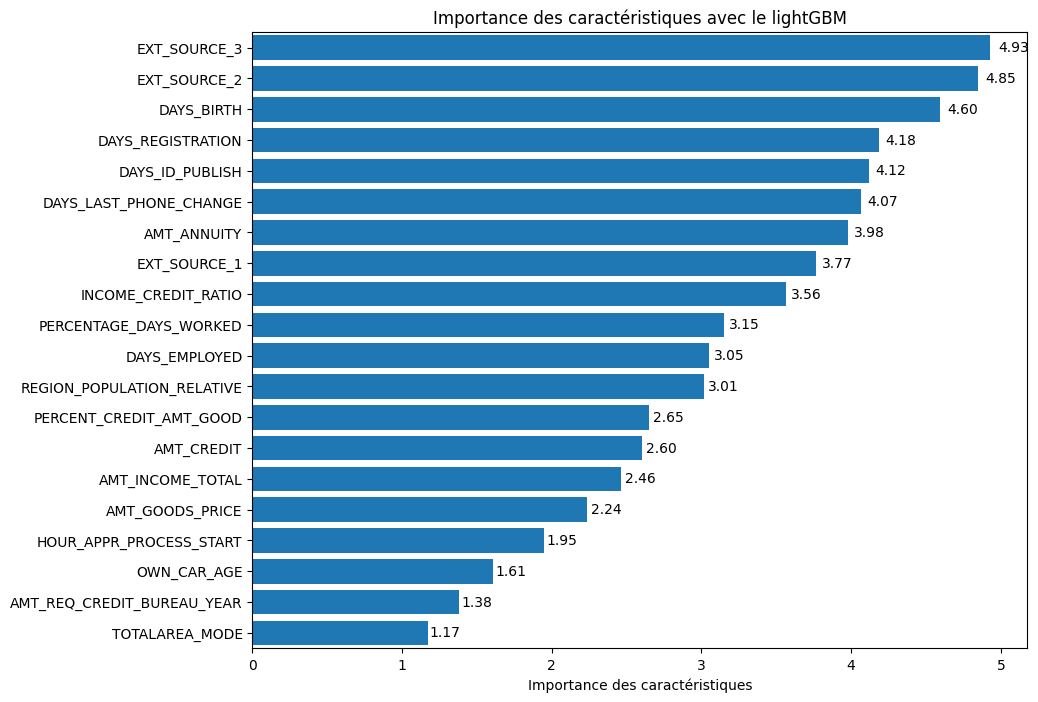

In [130]:
### Visualisation des features importances : 
import numpy as np
import matplotlib.pyplot as plt

# Extraire les colonnes 'feature' et 'importance' de votre dataframe
features = df_feature_importances_lightGBM['feature'].to_numpy()
importances = df_feature_importances_lightGBM['importance'].to_numpy()

# Création d'un masque pour les importances supérieures à 0
mask = importances > 0

# Filtrage des features et des importances en utilisant le masque
filtered_feature_names = features[mask]
filtered_feature_importances = importances[mask]

# Supposons que vous vouliez afficher les 10 principales caractéristiques
n_features_to_display = 20

# Tri des indices filtrés par importance
sorted_idx = filtered_feature_importances.argsort()

# Limiter aux n principales caractéristiques
top_n_idx = sorted_idx[-n_features_to_display:]

# Affichage de l'importance des caractéristiques filtrées pour les n principales
plt.figure(figsize=(10, len(top_n_idx) * 0.4))
bars = plt.barh(filtered_feature_names[top_n_idx], filtered_feature_importances[top_n_idx])

# Ajuster les limites de l'axe des y pour réduire l'espace autour des barres
plt.ylim(-0.5, len(top_n_idx)-0.5)

plt.xlabel("Importance des caractéristiques")
plt.title("Importance des caractéristiques avec le lightGBM")

# Ajouter les valeurs à côté des barres
for bar in bars:
    width = bar.get_width()
    
    # Déterminez le formatage en fonction de la magnitude
    if width < 0.01:
        fmt = '{:.4f}'
    elif width < 0.1:
        fmt = '{:.3f}'
    else:
        fmt = '{:.2f}'
    
    plt.text(width + 0.01 * width,  # Ajouter un padding proportionnel à la valeur
             bar.get_y() + bar.get_height() / 2,
             fmt.format(width),
             va='center', ha='left')

plt.show()

### 2.3.3 Dataset petit encoded

On applique également la même logique sur le dataset réduit avec encodage des valeurs catégorielles.

In [38]:
### Importation des données : 
application_train_petit_encoded = pd.read_csv('C:\Users\anais\Documents\Data Science\Projets\Projet 7\Données\application_test_petit_encoded.csv')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2825639940.py, line 1)

In [74]:
### Implémentation du modèle : 
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from sklearn.preprocessing import StandardScaler
import gc
import time
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import optuna
import logging

optuna_logger = logging.getLogger('optuna')
optuna_logger.setLevel(logging.CRITICAL)

start_time = time.time()

# Configuration initiale de MLflow
mlflow.set_experiment('LightGBM')

# Supposition : vous avez déjà votre dataframe 'df_classification' chargé
nb_0 = (application_train_petit_encoded['TARGET'] == 0).sum()
nb_1 = (application_train_petit_encoded['TARGET'] == 1).sum()

X = application_train_petit_encoded.drop(columns=["TARGET", "SK_ID_CURR"])
y = application_train_petit_encoded["TARGET"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

cv = StratifiedKFold(n_splits=5)
class_weights = {0: 1, 1: nb_0 / nb_1}

results = []

total_combinations = 50  # définissez cela avant d'appeler study.optimize()

def objective(trial):
    lr = trial.suggest_float('lr', 0.001, 0.1, log=True)
    num_leaves = trial.suggest_int('num_leaves', 31, 70)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, log=True)
    threshold = trial.suggest_float('threshold', 0.4, 0.6, step=0.01)

    model = LGBMClassifier(learning_rate=lr, num_leaves=num_leaves, n_estimators=n_estimators, class_weight=class_weights, verbose=-1)
    
    # Enregistrement du temps de début pour le fit
    start_fit_time = time.time()
    y_prob = cross_val_predict(model, X, y, cv=cv, method="predict_proba")[:, 1]
    # Calculer le temps de fit
    fit_duration = time.time() - start_fit_time

    # Enregistrement du temps de début pour la prédiction
    start_pred_time = time.time()
    y_pred = y_prob > threshold
    # Calculer le temps de prédiction
    pred_duration = time.time() - start_pred_time

    auc = roc_auc_score(y, y_prob)
    acc = accuracy_score(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    cost = fp + 10 * fn
    
    results.append({
        "Learning Rate": lr,
        "Num Leaves": num_leaves,
        "Threshold": threshold,
        "AUC": auc,
        "Accuracy": acc,
        "Business Score": cost
    })

    with mlflow.start_run():
        mlflow.log_param("Learning Rate", lr)
        mlflow.log_param("Num Leaves", num_leaves)
        mlflow.log_param("N Estimators", n_estimators) 
        mlflow.log_param("Threshold", round(threshold, 2))
        mlflow.log_metric("AUC", auc)
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("Business Score", cost)
        
        # Enregistrer les temps dans mlflow
        mlflow.log_metric("Fit Time", fit_duration)
        mlflow.log_metric("Prediction Time", pred_duration)

        fpr, tpr, _ = roc_curve(y, y_prob)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve.png")
        plt.close()
        mlflow.log_artifact("roc_curve.png")

        mlflow.sklearn.log_model(model, "model")
    
    gc.collect()

    return cost

def print_progress(study, trial, total_combinations):
    print(f"Essai {trial.number + 1}/{total_combinations} terminé!", end='\r', flush=True)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=total_combinations, callbacks=[lambda study, trial: print_progress(study, trial, total_combinations)])

# 6. Afficher les résultats
results_df = pd.DataFrame(results)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTemps écoulé: {elapsed_time:.2f} secondes")

print(study.best_params)

Essai 50/50 terminé!
Temps écoulé: 2296.24 secondes
{'lr': 0.02127915254605793, 'num_leaves': 58, 'n_estimators': 481, 'threshold': 0.52}


In [76]:
### Résultat du Light GBM : 
styled_df_LGM = results_df.sort_values(by='Business Score', ascending=True)

In [78]:
### Enregistrement des résultats en csv : 
styled_df_LGM.to_csv('results_LGM.csv', index=False)

In [80]:
### Visualisation des résultats : 
def highlight_max(s):
    '''
    Mettez en surbrillance la valeur maximale d'une série en vert.
    '''
    is_max = s == s.max()
    return ['background-color: green' if v else '' for v in is_max]

def highlight_min(s):
    '''
    Mettez en surbrillance la valeur minimale d'une série en vert.
    '''
    is_min = s == s.min()
    return ['background-color: green' if v else '' for v in is_min]

styled_df_LGM = (styled_df_LGM.style.apply(highlight_max, subset=['AUC', 'Accuracy'])
                          .apply(highlight_min, subset=['Business Score'])
                          .format({'Threshold': "{:g}"}))

styled_df_LGM

,Learning Rate,Num Leaves,Threshold,AUC,Accuracy,Business Score
45,0.021279,58,0.52,0.702497,0.720598,184849
44,0.023916,57,0.51,0.702277,0.714661,184918
23,0.021340,49,0.52,0.702823,0.720266,185167
21,0.012676,48,0.5,0.702986,0.688762,185306
48,0.036569,57,0.52,0.701693,0.728016,185495
11,0.009319,39,0.52,0.702562,0.708585,185534
14,0.011339,46,0.51,0.702866,0.701889,185548
15,0.011228,48,0.5,0.702802,0.688157,185600
41,0.010757,49,0.51,0.702637,0.702065,185692
37,0.020603,41,0.5,0.702561,0.688671,185694


#### Feature importance 

In [84]:
### Meilleurs paramètres du modèle : 
study.best_params

{'lr': 0.02127915254605793,
 'num_leaves': 58,
 'n_estimators': 481,
 'threshold': 0.52}

In [86]:
### Feature importance : 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Supposition que df_classification_imputed est déjà défini
nb_0 = len(application_train_petit_encoded[application_train_petit_encoded["TARGET"] == 0])
nb_1 = len(application_train_petit_encoded[application_train_petit_encoded["TARGET"] == 1])
class_weights = {0: 1, 1: nb_0 / nb_1}

X = application_train_petit_encoded.drop(columns=["TARGET", "SK_ID_CURR"])
y = application_train_petit_encoded["TARGET"]

# Stockage des noms des colonnes pour utilisation ultérieure
feature_names = X.columns

# Standardisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)  

# Instanciation du modèle
clf = LGBMClassifier(**study.best_params, class_weight=class_weights, verbose=1)

# Validation croisée
cv = StratifiedKFold(n_splits=5)
feature_importances = np.zeros(X.shape[1])

for train, test in cv.split(X, y):
    clf.fit(X[train], y.iloc[train])
    feature_importances += clf.feature_importances_

# Moyenne des importances de caractéristiques sur les plis
feature_importances /= 5

[LightGBM] [Warning] Unknown parameter: lr
[LightGBM] [Warning] Unknown parameter: threshold
[LightGBM] [Warning] Unknown parameter: lr
[LightGBM] [Warning] Unknown parameter: threshold
[LightGBM] [Info] Number of positive: 19842, number of negative: 225940
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3316
[LightGBM] [Info] Number of data points in the train set: 245782, number of used features: 231
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499995 -> initscore=-0.000020
[LightGBM] [Info] Start training from score -0.000020
[LightGBM] [Warning] Unknown parameter: lr
[LightGBM] [Warning] Unknown parameter: threshold
[LightGBM] [Warning] Unknown parameter: lr
[LightGBM] [Warning] Unknown parameter: threshold
[LightGBM] [Info] Number of positive: 19842, number of negative: 22

In [87]:
### Création d'un dataframe pour les features importances : 
df_feature_importances_lightGBM = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

### Organisation des features importances dans l'ordre croissant : 
df_feature_importances_lightGBM = df_feature_importances_lightGBM.sort_values(by='importance', ascending=False)
df_feature_importances_lightGBM["importance"] = (df_feature_importances_lightGBM["importance"]/ df_feature_importances_lightGBM["importance"].sum())*100

In [88]:
### Enregistrement des features importances en csv : 
df_feature_importances_lightGBM.to_csv('df_feature_importances_lightGBM.csv', index=False)

In [89]:
### Visualisation des features importances : 
df_feature_importances_lightGBM

,feature,importance
77,DAYS_LAST_PHONE_CHANGE,7.249517
9,DAYS_ID_PUBLISH,7.228362
8,DAYS_REGISTRATION,7.175110
6,DAYS_BIRTH,6.817668
3,AMT_ANNUITY,6.768793
...,...,...
196,ORGANIZATION_TYPE_Industry: type 8,0.000000
51,FLOORSMAX_MODE,0.000000
50,ENTRANCES_MODE,0.000000
49,ELEVATORS_MODE,0.000000


In [90]:
Pourcentage_importance_totale = 95

# Organisation du dataframe en ordre décroissant d'importance :
df_sorted = df_feature_importances_lightGBM.sort_values(by="importance", ascending=False)

# Calcul de l'importance cumulative : 
df_sorted["cumulative_importance"] = df_sorted["importance"].cumsum()

# Calcul du nombre de features nécessaires pour atteindre 95% de l'importance totale : 
num_features = df_sorted[df_sorted["cumulative_importance"] <= df_sorted["importance"].sum() * Pourcentage_importance_totale/100].shape[0]

num_features

88

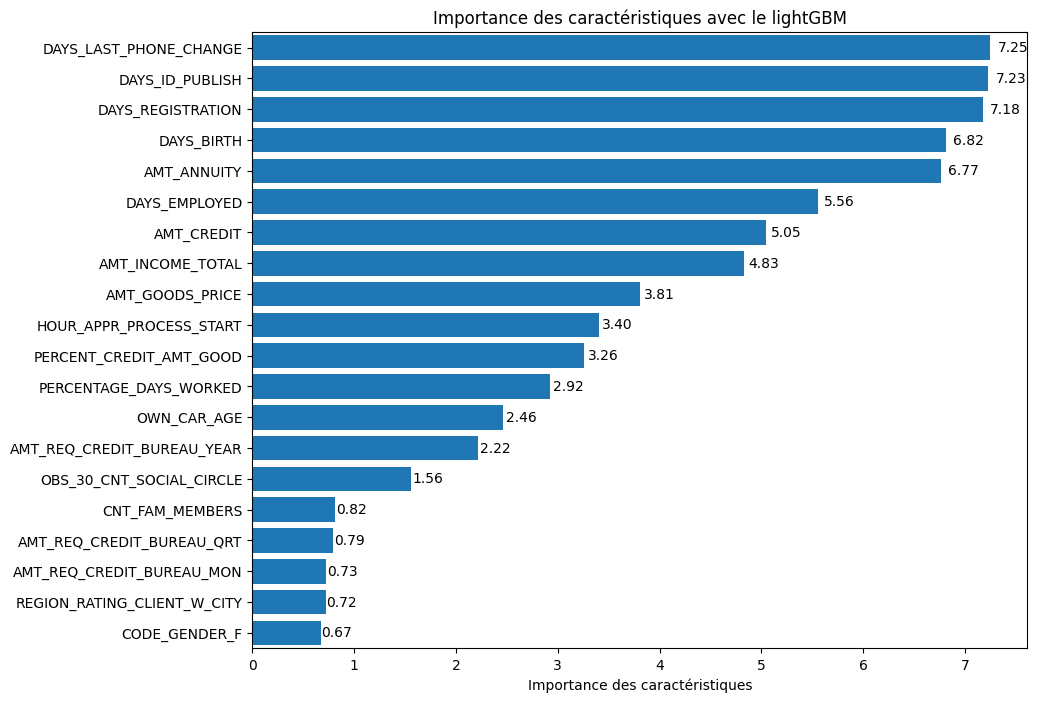

In [91]:
### Visualisation des features importances : 
import numpy as np
import matplotlib.pyplot as plt

# Extraire les colonnes 'feature' et 'importance' de votre dataframe
features = df_feature_importances_lightGBM['feature'].to_numpy()
importances = df_feature_importances_lightGBM['importance'].to_numpy()

# Création d'un masque pour les importances supérieures à 0
mask = importances > 0

# Filtrage des features et des importances en utilisant le masque
filtered_feature_names = features[mask]
filtered_feature_importances = importances[mask]

# Supposons que vous vouliez afficher les 10 principales caractéristiques
n_features_to_display = 20

# Tri des indices filtrés par importance
sorted_idx = filtered_feature_importances.argsort()

# Limiter aux n principales caractéristiques
top_n_idx = sorted_idx[-n_features_to_display:]

# Affichage de l'importance des caractéristiques filtrées pour les n principales
plt.figure(figsize=(10, len(top_n_idx) * 0.4))
bars = plt.barh(filtered_feature_names[top_n_idx], filtered_feature_importances[top_n_idx])

# Ajuster les limites de l'axe des y pour réduire l'espace autour des barres
plt.ylim(-0.5, len(top_n_idx)-0.5)

plt.xlabel("Importance des caractéristiques")
plt.title("Importance des caractéristiques avec le lightGBM")

# Ajouter les valeurs à côté des barres
for bar in bars:
    width = bar.get_width()
    
    # Déterminez le formatage en fonction de la magnitude
    if width < 0.01:
        fmt = '{:.4f}'
    elif width < 0.1:
        fmt = '{:.3f}'
    else:
        fmt = '{:.2f}'
    
    plt.text(width + 0.01 * width,  # Ajouter un padding proportionnel à la valeur
             bar.get_y() + bar.get_height() / 2,
             fmt.format(width),
             va='center', ha='left')

plt.show()

# 3. Création du pipeline de prédiction

Le modèle le plus efficace semble être LightGBM.

## Standardisation

### 3.1 Dataset complet

In [48]:
### Scaler : 
import pandas as pd
from sklearn.preprocessing import StandardScaler
import joblib

application_train_scaler = application_train.drop(columns=['SK_ID_CURR','TARGET'])

scaler = StandardScaler()

# Ajustez le scaler à vos données d'entraînement
scaler.fit(application_train_scaler)

# Sauvegarder le scaler pour une utilisation ultérieure
joblib.dump(scaler, "StandardScaler.pkl")

['StandardScaler.pkl']

In [26]:
### Définition de X_train et X_test : 
X_train = application_train.drop(columns=["TARGET", "SK_ID_CURR"])
X_test = application_test.drop(columns=["TARGET"])

In [27]:
### Séparation des jeux de données : 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8)

In [28]:
### On standardise nos données, c'est à dire qu'on centre et réduit nos données 
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Obtenir les meilleurs paramètres
best_params = study.best_params

# Affichage des meilleurs paramètres pour vérification
print("Best Parameters:", best_params)

Best Parameters: {'lr': 0.022171727544900058, 'num_leaves': 57, 'n_estimators': 498, 'threshold': 0.5}


In [30]:
### Création du pipeline : 
pipeline = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()), 
    ('regressor', LGBMClassifier(
        learning_rate=best_params['lr'], 
        num_leaves=best_params['num_leaves'], 
        n_estimators=best_params['n_estimators'], 
        class_weight=class_weights,
        verbose=-1
    ))
])

In [31]:
### Apprentissage sur les données train : 
pipeline.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 LGBMClassifier(class_weight={0: 1, 1: 11.386727412006612},
                                learning_rate=0.022171727544900058,
                                n_estimators=498, num_leaves=57, verbose=-1))])

In [127]:
### Calcul des performances : 
pipeline.score(X_test, y_test)

0.6703121439963545

#### Sérialisation 

In [33]:
import joblib

In [34]:
joblib.dump(pipeline, 'pipeline_home_credit_complet.joblib')

['pipeline_home_credit_complet.joblib']

#### Signature MLFlow

In [35]:
from mlflow.models.signature import infer_signature

In [36]:
signature = infer_signature(X_train, y_train)

#### Sauvegarde du modèle 

In [37]:
import mlflow.sklearn

In [38]:
### Sauvegarde du pipeline : 
mlflow.sklearn.save_model(pipeline, 'mlflow_model_complet', signature=signature)

MlflowException: Path 'mlflow_model_complet' already exists and is not empty

### 3.1bis.1 Dataset complet light

In [109]:
### Importation des données : 
dataset_complet_light = pd.read_csv('../Données/dataset_complet_light.csv')
application_train_light = pd.read_csv('../Données/application_train_light.csv')
application_test_light = pd.read_csv('../Données/application_test_light.csv')

In [88]:
# préparation du jeu de données pour la mise à l'échelle :
application_train_scaler_light = application_train_light.drop(columns=['SK_ID_CURR','TARGET'])

# Séparation des jeux de données
X_train, X_test, y_train, y_test = train_test_split(application_train_scaler_light, application_train_light['TARGET'], train_size=0.8, random_state=42)

# Initialisation et ajustement du StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

# Affichage du nombre de caractéristiques apprises
print(scaler.n_features_in_) 

# Sauvegarder le scaler pour une utilisation ultérieure
joblib.dump(scaler, "StandardScaler_light.pkl")

60


['StandardScaler_light.pkl']

In [112]:
### Vérification des tailles et contenus des datasets :
print("Shape de X_train:", X_train.shape)
print("Shape de y_train:", y_train.shape)
print("Valeurs manquantes dans X_train:", pd.DataFrame(X_train).isnull().sum().sum())
print("Valeurs manquantes dans y_train:", pd.Series(y_train).isnull().sum())

Shape de X_train: (245782, 60)
Shape de y_train: (245782,)
Valeurs manquantes dans X_train: 1695443
Valeurs manquantes dans y_train: 0


In [100]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Préparer les données
X = application_train_light.drop(columns=["TARGET", "SK_ID_CURR"])
y = application_train_light["TARGET"]

# Initialiser le scaler
scaler = StandardScaler()

# Ajuster et transformer les données
X_scaled = scaler.fit_transform(X)  # La sortie sera un NumPy array
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)  # Convertir en DataFrame avec noms de colonnes

In [101]:
### Création du pipeline : 
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', LGBMClassifier(
        learning_rate=best_params['lr'], 
        num_leaves=best_params['num_leaves'], 
        n_estimators=best_params['n_estimators'], 
        class_weight=class_weights,
        verbose=-1
    ))
])

In [102]:
### Apprentissage sur les données train : 
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LGBMClassifier(class_weight={0: 1, 1: 11.386727412006612},
                                learning_rate=0.003239940187366094,
                                n_estimators=644, num_leaves=53, verbose=-1))])

In [103]:
### Calcul des performances : 
pipeline.score(X_test, y_test)

0.6703121439963545

In [104]:
### Sérialisation : 
joblib.dump(pipeline, 'pipeline_home_credit_complet_light.joblib')

['pipeline_home_credit_complet_light.joblib']

In [105]:
from mlflow.models.signature import infer_signature
signature = infer_signature(X_train, y_train)

C:\Users\anais\anaconda3\Lib\site-packages\mlflow\types\utils.py:406: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(


In [108]:
### Sauvegarde du modèle :
import mlflow.sklearn

### Sauvegarde du pipeline : 
mlflow.sklearn.save_model(pipeline, 'mlflow_model_complet_light', signature=signature)

### 3.1bis.2 Exemple de feature importance locale sur un individu

In [120]:
# Calcul des valeurs SHAP pour un client spécifique
client_index = 100002  # L'index du client dans le jeu de test
client_data_scaled = X_scaled[[client_index], :]  # Extraire les données mises à l'échelle du client

# Initialiser l'explainer SHAP avec le modèle dans le pipeline
explainer = shap.Explainer(pipeline.named_steps['classifier'], X_scaled)

# Calculer les valeurs SHAP locales pour ce client
shap_values = explainer(client_data_scaled)

# Créer un DataFrame avec les valeurs SHAP
shap_local_df = pd.DataFrame(shap_values.values, columns=X.columns)

# Trier par l'impact des SHAP values pour ce client
shap_local_importance = np.abs(shap_local_df).mean(axis=0).sort_values(ascending=False)

# Obtenir les 10 features les plus influentes pour ce client
top_shap_local_features = shap_local_importance.head(10)

# Afficher les résultats pour ce client spécifique
print(top_shap_local_features)

BURO_DAYS_CREDIT_MEAN               0.156089
DAYS_BIRTH                          0.138899
BURO_AMT_CREDIT_MAX_OVERDUE_MEAN    0.116752
CC_DAYS_INSTALMENT_VAR              0.097127
BURO_DAYS_CREDIT_MAX                0.083606
BURO_AMT_CREDIT_SUM_DEBT_MEAN       0.075973
ACTIVE_DAYS_CREDIT_ENDDATE_MIN      0.073125
PERCENT_CREDIT_AMT_GOOD             0.066632
DAYS_EMPLOYED                       0.062604
PREV_CNT_PAYMENT_MEAN               0.046781
dtype: float64


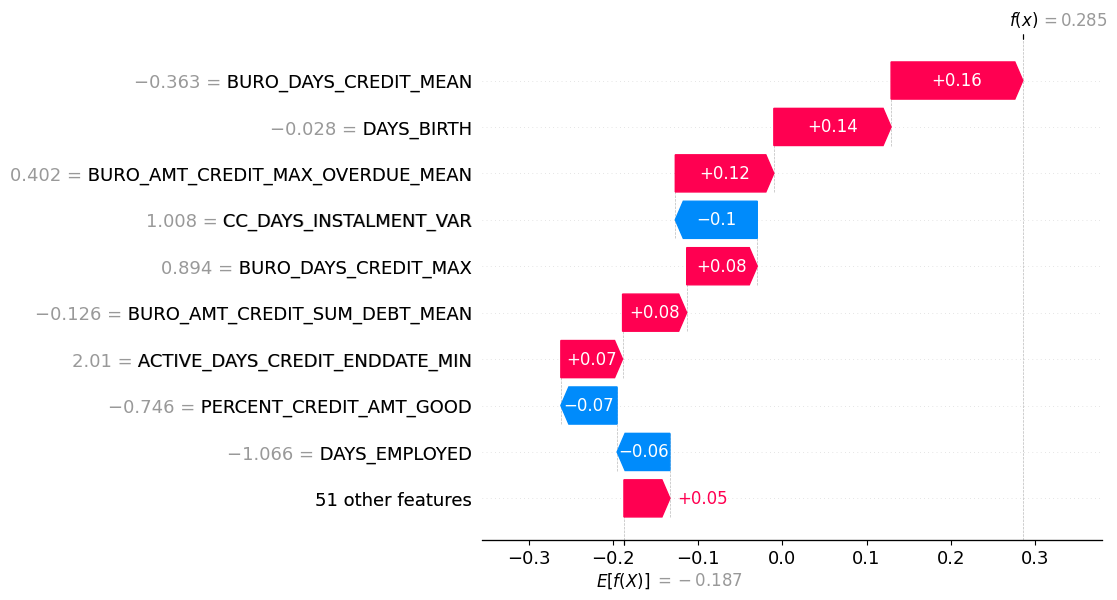

In [122]:
import shap

# Calcul des valeurs SHAP pour un client spécifique
client_index = 100002  # L'index du client dans le jeu de test
client_data_scaled = X_scaled[[client_index], :]  # Extraire les données mises à l'échelle du client

# Initialiser l'explainer SHAP avec le modèle dans le pipeline
explainer = shap.Explainer(pipeline.named_steps['classifier'], X_scaled)

# Calculer les valeurs SHAP locales pour ce client
shap_values = explainer(client_data_scaled)

# Créer un DataFrame avec les valeurs SHAP et les noms de colonnes correspondants
shap_local_df = pd.DataFrame(shap_values.values, columns=X.columns)

# Trier les valeurs SHAP et les features par leur impact dans l'ordre croissant
sorted_shap_local_importance = shap_local_df.T.sort_values(by=0, ascending=True)
sorted_feature_names = sorted_shap_local_importance.index
sorted_shap_values = sorted_shap_local_importance[0].values

# Recréer un shap_values spécifique trié avec les noms de features rangées
sorted_shap_values_obj = shap.Explanation(
    values=sorted_shap_values,
    base_values=shap_values[0].base_values,
    data=client_data_scaled[0],  # Utiliser les données du client non triées pour le graphique
    feature_names=sorted_feature_names
)

# Visualisation avec un waterfall plot avec des noms de features et triés
shap.plots.waterfall(sorted_shap_values_obj)

### 3.2 Dataset petit

In [90]:
### Définition de X_train et X_test : 
X_train_petit = application_train_petit_clean.drop(columns=["TARGET", "SK_ID_CURR"])
X_test_petit = application_test_petit.drop(columns=["TARGET", "SK_ID_CURR"])

In [92]:
### Séparation des jeux de données : 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8)

NameError: name 'X' is not defined

In [94]:
### On standardise nos données, c'est à dire qu'on centre et réduit nos données 
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

NameError: name 'X_train' is not defined

In [181]:
# Obtenez les meilleurs paramètres
best_params = study.best_params

# Affichez les meilleurs paramètres pour vérification
print("Best Parameters:", best_params)

Best Parameters: {'lr': 0.03202900440110068, 'num_leaves': 50, 'n_estimators': 500, 'threshold': 0.52}


In [183]:
### Pipeline test petit dataset : 
pipeline = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()), 
    ('regressor', LGBMClassifier(
        learning_rate=best_params['lr'], 
        num_leaves=best_params['num_leaves'], 
        n_estimators=best_params['n_estimators'], 
        class_weight=class_weights,
        verbose=-1
    ))
])

In [185]:
### Apprentissage sur les données train : 
pipeline.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 LGBMClassifier(class_weight={0: 1, 1: 11.386727412006612},
                                learning_rate=0.03202900440110068,
                                n_estimators=500, num_leaves=50, verbose=-1))])

In [187]:
### Calcul des performances : 
pipeline.score(X_test, y_test)

0.7411385606874329

#### Sérialisation 

In [192]:
import joblib

In [196]:
joblib.dump(pipeline, 'pipeline_home_credit.joblib')

['pipeline_home_credit.joblib']

#### Signature MLFlow

In [200]:
from mlflow.models.signature import infer_signature

In [205]:
signature = infer_signature(X_train, y_train)

#### Sauvegarde du modèle 

In [212]:
import mlflow.sklearn

In [ ]:
### Sauvegarde du pipeline : 
mlflow.sklearn.save_model(pipeline, 'mlflow_model', signature=signature)

### 3.3 Dataset petit encoded

In [101]:
### Séparation des jeux de données : 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8)

In [103]:
### On standardise nos données, c'est à dire qu'on centre et réduit nos données 
scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
# Obtenez les meilleurs paramètres
best_params = study.best_params

# Affichez les meilleurs paramètres pour vérification
print("Best Parameters:", best_params)

Best Parameters: {'lr': 0.02127915254605793, 'num_leaves': 58, 'n_estimators': 481, 'threshold': 0.52}


In [107]:
### Pipeline test petit dataset : 
pipeline = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler()), 
    ('regressor', LGBMClassifier(
        learning_rate=best_params['lr'], 
        num_leaves=best_params['num_leaves'], 
        n_estimators=best_params['n_estimators'], 
        class_weight=class_weights,
        verbose=-1
    ))
])

In [109]:
### Apprentissage sur les données train : 
pipeline.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 LGBMClassifier(class_weight={0: 1, 1: 11.386727412006612},
                                learning_rate=0.02127915254605793,
                                n_estimators=481, num_leaves=58, verbose=-1))])

In [111]:
### Calcul des performances : 
pipeline.score(X_test, y_test)

0.704700061842919

#### Sérialisation

In [114]:
import joblib
joblib.dump(pipeline, 'pipeline_home_credit.joblib')

['pipeline_home_credit.joblib']

#### Signature MLFlow

In [118]:
from mlflow.models.signature import infer_signature
signature = infer_signature(X_train, y_train)

#### Sauvegarde du modèle 

In [124]:
import mlflow.sklearn
### Sauvegarde du pipeline : 
mlflow.sklearn.save_model(pipeline, 'mlflow_model_dataset_petit_encoded', signature=signature)

#### Test de prédiction de refus

In [6]:
import pandas as pd
import mlflow.pyfunc

# Charger les datasets
train_df = pd.read_csv('application_train_petit_encoded.csv')
test_df = pd.read_csv('application_test_petit_encoded.csv')

# Charger le modèle MLflow
model = mlflow.pyfunc.load_model("mlflow_model_dataset_petit_encoded")

C:\Users\anais\anaconda3\lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [16]:
# Faire des prédictions sur un sous-ensemble aléatoire de données d'entraînement
subset = train_df.sample(n=1000, random_state=42).drop(columns=['SK_ID_CURR', 'TARGET']).astype('float64')
client_ids = train_df.sample(n=1000, random_state=42)['SK_ID_CURR']

# Faire des prédictions
predictions = model.predict(subset)

# Ajouter les prédictions aux données originales
results_df = pd.DataFrame({'SK_ID_CURR': client_ids, 'prediction': predictions})

# Trouver un client refusé
refused_client = results_df[results_df['prediction'] == 1]['SK_ID_CURR'].values

if len(refused_client) > 0:
    print(f"Numéro de client refusé trouvé : {refused_client[0]}")
else:
    print("Aucun client refusé trouvé.")

Aucun client refusé trouvé.


In [18]:
# Faire des prédictions sur l'ensemble des données d'entraînement
subset = train_df.drop(columns=['SK_ID_CURR', 'TARGET']).astype('float64')
client_ids = train_df['SK_ID_CURR']

# Faire des prédictions
predictions = model.predict(subset)

# Ajouter les prédictions aux données originales
results_df = pd.DataFrame({'SK_ID_CURR': client_ids, 'prediction': predictions})

# Trouver un client refusé
refused_client = results_df[results_df['prediction'] == 1]['SK_ID_CURR'].values

if len(refused_client) > 0:
    print(f"Numéro de client refusé trouvé : {refused_client[0]}")
else:
    print("Aucun client refusé trouvé.")


Aucun client refusé trouvé.


# 4. Récapilatif des performances des modèles

## 4.1 Implémentation des modèles pour mesurer leurs performances

In [ ]:
import pandas as pd
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, fbeta_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import gc
import time
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import optuna
import logging

# Configurer le logging
optuna_logger = logging.getLogger('optuna')
optuna_logger.setLevel(logging.CRITICAL)

start_time = time.time()

# Configuration initiale de MLflow
mlflow.set_experiment('Model_Comparison')

# Charger les données
df = pd.read_csv('application_train_petit_encoded.csv')
test_df = pd.read_csv('application_test_petit_encoded.csv')

# Séparer les caractéristiques et la cible
X = df.drop(columns=["TARGET", "SK_ID_CURR"])
y = df["TARGET"]

# Normaliser les caractéristiques
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Définir les plis de validation croisée
cv = StratifiedKFold(n_splits=5)

# Calculer les poids de classe
nb_0 = (y == 0).sum()
nb_1 = (y == 1).sum()
class_weights = {0: 1, 1: nb_0 / nb_1}

# Résultats
results = []

total_combinations = 50  # Définissez cela avant d'appeler study.optimize()

def objective(trial, model, X_train, y_train, strategy, metric):
    lr = None
    num_leaves = None
    n_estimators = None
    threshold = trial.suggest_float('threshold', 0.4, 0.6, step=0.01)

    if isinstance(model, LGBMClassifier):
        lr = trial.suggest_float('lr', 0.001, 0.1, log=True)
        num_leaves = trial.suggest_int('num_leaves', 31, 70)
        n_estimators = trial.suggest_int('n_estimators', 100, 1000, log=True)

        if strategy == 'none':
            model.set_params(learning_rate=lr, num_leaves=num_leaves, n_estimators=n_estimators)
        elif strategy == 'class_weight':
            model.set_params(learning_rate=lr, num_leaves=num_leaves, n_estimators=n_estimators, class_weight=class_weights)
        elif strategy == 'smote':
            smote = SMOTE(random_state=42)
            X_train, y_train = smote.fit_resample(X_train, y_train)
            model.set_params(learning_rate=lr, num_leaves=num_leaves, n_estimators=n_estimators)

    elif isinstance(model, LogisticRegression):
        if strategy == 'class_weight':
            model.set_params(class_weight=class_weights)
        elif strategy == 'smote':
            smote = SMOTE(random_state=42)
            X_train, y_train = smote.fit_resample(X_train, y_train)

    start_fit_time = time.time()
    y_prob = cross_val_predict(model, X_train, y_train, cv=cv, method="predict_proba")[:, 1]
    fit_duration = time.time() - start_fit_time

    start_pred_time = time.time()
    y_pred = y_prob > threshold
    pred_duration = time.time() - start_pred_time

    auc = roc_auc_score(y_train, y_prob)
    acc = accuracy_score(y_train, y_pred)
    fbeta = fbeta_score(y_train, y_pred, beta=1.0)
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
    cost = fp + 10 * fn

    if metric == 'business':
        score = cost
    else:
        score = fbeta

    results.append({
        "Model": type(model).__name__,
        "Strategy": strategy,
        "Metric": metric,
        "Learning Rate": lr,
        "Num Leaves": num_leaves,
        "Threshold": threshold,
        "AUC": auc,
        "Accuracy": acc,
        "Business Score": cost,
        "F-beta": fbeta,
        "Fit Time": fit_duration,
        "Prediction Time": pred_duration
    })

    with mlflow.start_run():
        mlflow.log_param("Model", type(model).__name__)
        mlflow.log_param("Strategy", strategy)
        mlflow.log_param("Metric", metric)
        if isinstance(model, LGBMClassifier):
            mlflow.log_param("Learning Rate", lr)
            mlflow.log_param("Num Leaves", num_leaves)
            mlflow.log_param("N Estimators", n_estimators)
        mlflow.log_param("Threshold", round(threshold, 2))
        mlflow.log_metric("AUC", auc)
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("Business Score", cost)
        mlflow.log_metric("F-beta", fbeta)
        mlflow.log_metric("Fit Time", fit_duration)
        mlflow.log_metric("Prediction Time", pred_duration)

        fpr, tpr, _ = roc_curve(y_train, y_prob)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve.png")
        plt.close()
        mlflow.log_artifact("roc_curve.png")

        mlflow.sklearn.log_model(model, "model")

    gc.collect()

    return score

def print_progress(study, trial, total_combinations):
    print(f"Essai {trial.number + 1}/{total_combinations} terminé!", end='\r', flush=True)

# Modèles à tester
models = [
    DummyClassifier(strategy="most_frequent"),
    LogisticRegression(random_state=42, solver='liblinear'),
    LGBMClassifier(random_state=42)
]

# Stratégies à tester
strategies = ['none', 'class_weight', 'smote']

# Métriques à tester
metrics = ['business', 'f-beta']

for model in models:
    for strategy in strategies:
        for metric in metrics:
            study = optuna.create_study(direction='minimize' if metric == 'business' else 'maximize')
            study.optimize(lambda trial: objective(trial, model, X, y, strategy, metric), n_trials=total_combinations, callbacks=[lambda study, trial: print_progress(study, trial, total_combinations)])

# Afficher les résultats
results_df = pd.DataFrame(results)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTemps écoulé: {elapsed_time:.2f} secondes")

print(results_df.groupby(['Model', 'Strategy', 'Metric']).apply(lambda x: x.loc[x['Business Score'].idxmin() if 'Business Score' in x.columns else x['F-beta'].idxmax()]))


In [ ]:
results_df.groupby(['Model', 'Strategy', 'Metric']).apply(lambda x: x.loc[x['Business Score'].idxmin() if 'Business Score' in x.columns else x['F-beta'].idxmax()])

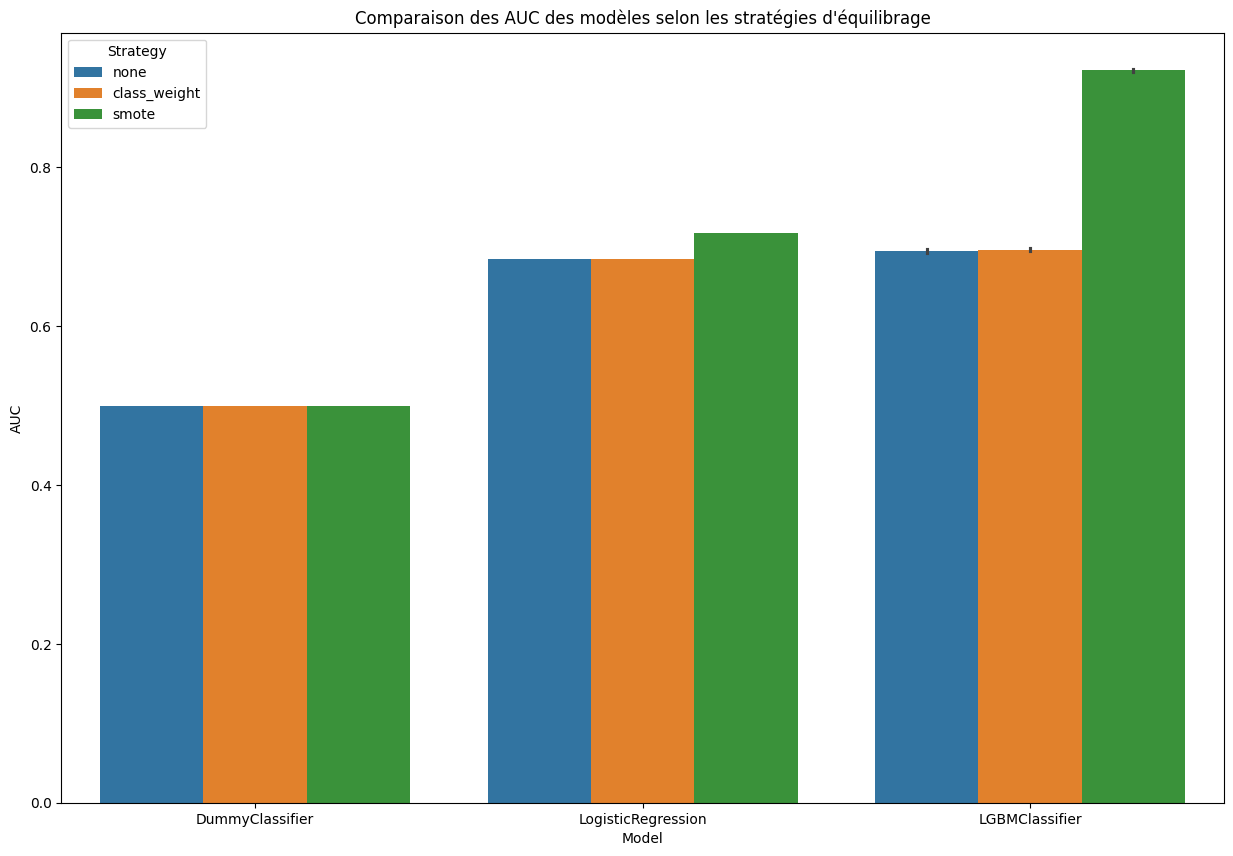

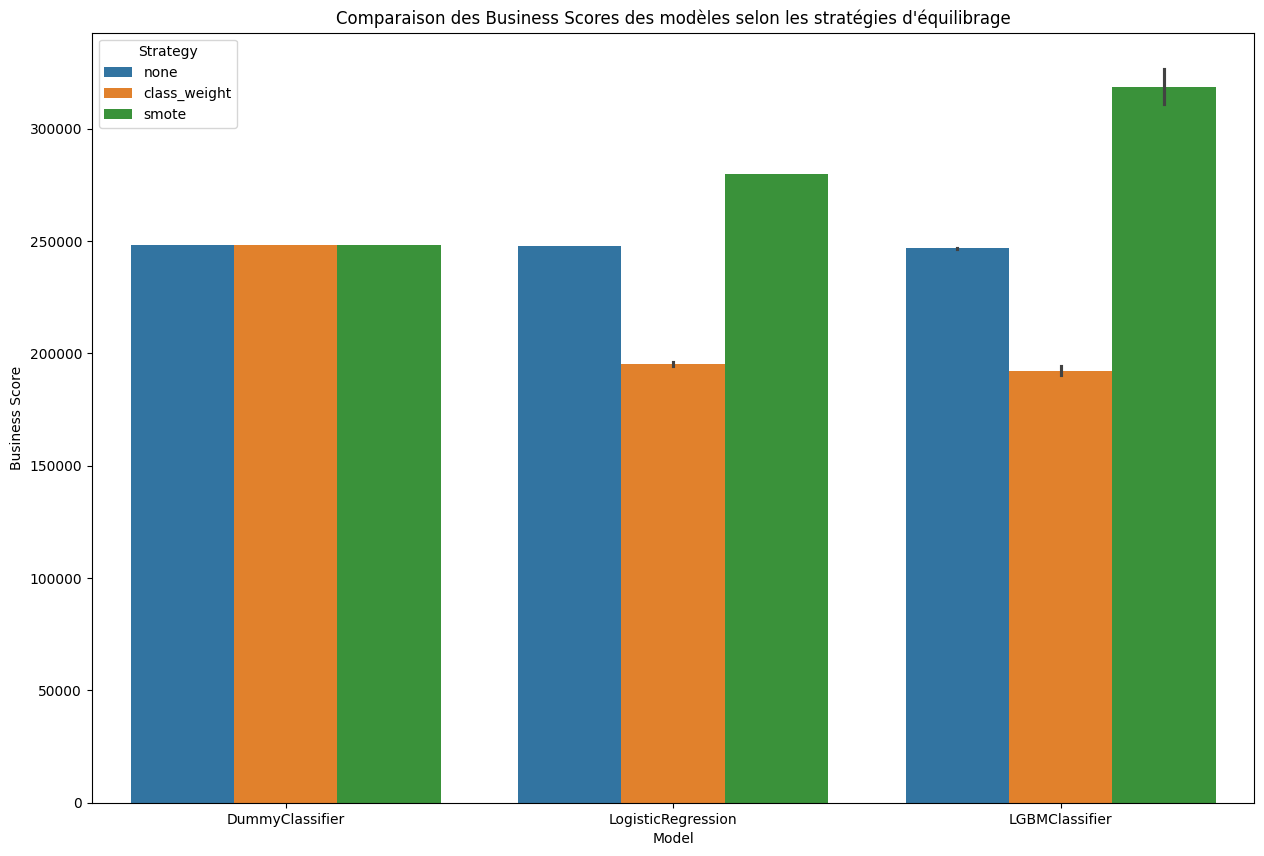

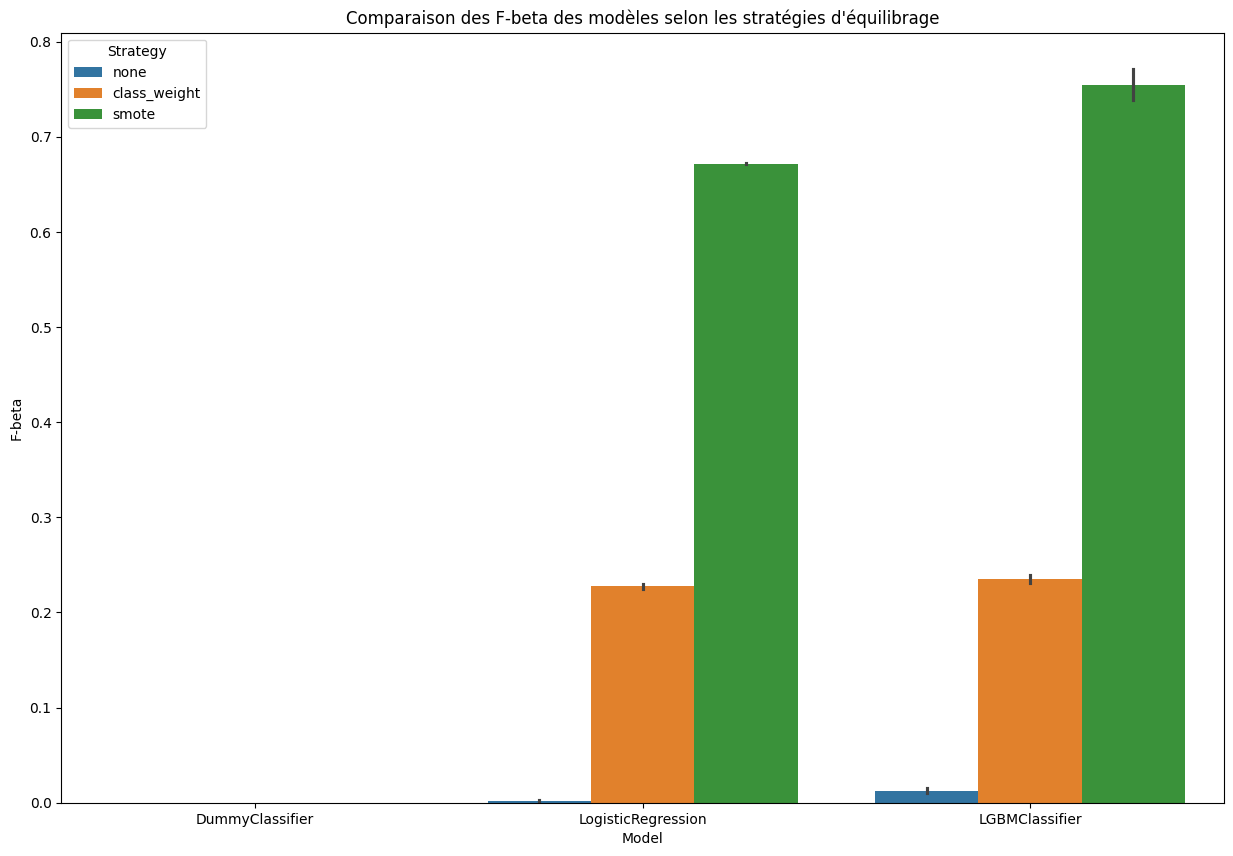

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation des résultats
plt.figure(figsize=(15, 10))
sns.barplot(x='Model', y='AUC', hue='Strategy', data=results_df)
plt.title('Comparaison des AUC des modèles selon les stratégies d\'équilibrage')
plt.show()

plt.figure(figsize=(15, 10))
sns.barplot(x='Model', y='Business Score', hue='Strategy', data=results_df)
plt.title('Comparaison des Business Scores des modèles selon les stratégies d\'équilibrage')
plt.show()

plt.figure(figsize=(15, 10))
sns.barplot(x='Model', y='F-beta', hue='Strategy', data=results_df)
plt.title('Comparaison des F-beta des modèles selon les stratégies d\'équilibrage')
plt.show()


ANALYSE : 
- Modèle Recommandé : LGBMClassifier
- Stratégie d'Équilibrage : class_weight pour sa robustesse sur les différentes métriques.
- Métriques : Utilisation combinée de Business Score et F-beta pour une évaluation complète.

## 4.2 Entrainement du dataset complet avec les paramètres choisis 

##### Modèle initial

Le modèle initial est principalement utilisé pour obtenir une compréhension de l'importance des features

In [ ]:
X = application_train_encoded.drop(columns=["TARGET", "SK_ID_CURR"])
y = application_train_encoded["TARGET"]

[LightGBM] [Info] Number of positive: 19842, number of negative: 225940
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.071725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3321
[LightGBM] [Info] Number of data points in the train set: 245782, number of used features: 232
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


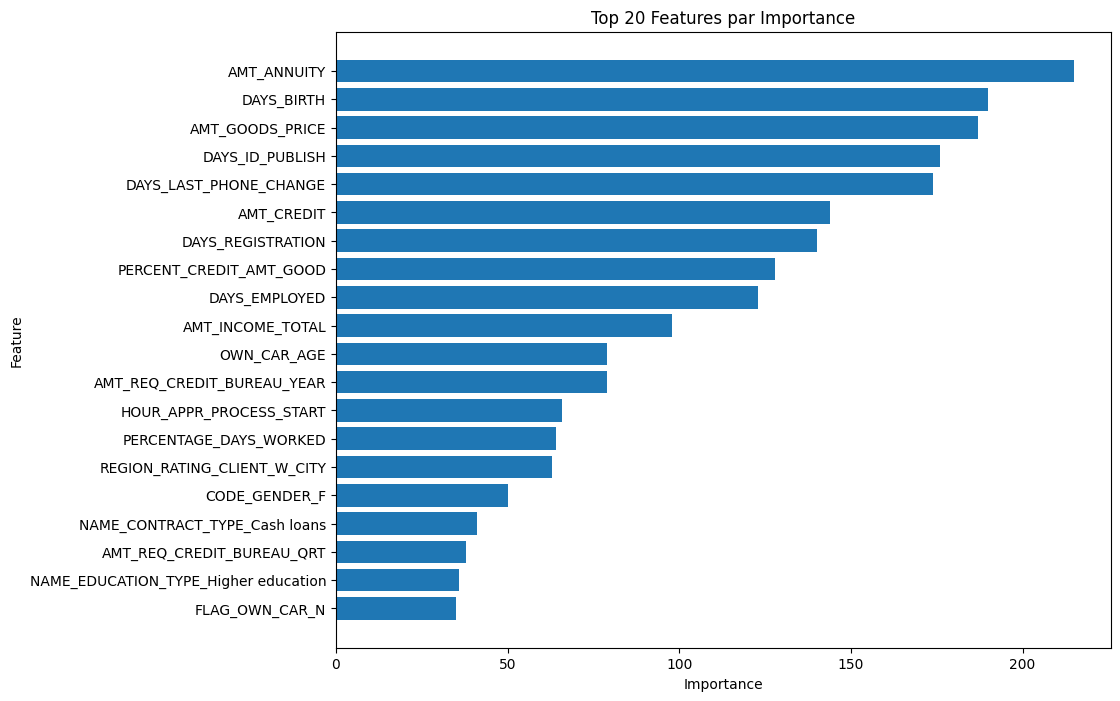

In [51]:
### Entraîner un Modèle Initial avec class_weight

import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('application_train_petit_encoded.csv')

# Séparer les caractéristiques et la cible
X = df.drop(columns=["TARGET", "SK_ID_CURR"])
y = df["TARGET"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculer les poids de classe
nb_0 = (y_train == 0).sum()
nb_1 = (y_train == 1).sum()
class_weights = {0: 1, 1: nb_0 / nb_1}

# Entraîner un modèle initial avec class_weight
initial_model = LGBMClassifier(random_state=42, class_weight=class_weights)
initial_model.fit(X_train, y_train)

# Obtenir les importances des features
feature_importances = initial_model.feature_importances_
features = X.columns

# Créer un DataFrame pour les importances des features
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Trier les features par importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualiser les importances des features
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Features par Importance')
plt.gca().invert_yaxis()
plt.show()

##### Sélection de features

In [53]:
### Sélectionner les Features Importantes

# Définir le nombre de features à sélectionner
num_features_to_select = 50  # Ajustez ce nombre selon vos besoins

# Sélectionner les top features
selected_features = feature_importance_df['Feature'][:num_features_to_select].values

# Réduire les datasets à ces features
X_train_reduced = pd.DataFrame(X_train, columns=features)[selected_features].values
X_test_reduced = pd.DataFrame(X_test, columns=features)[selected_features].values

##### Optimisation du modèle

In [55]:
### Optimiser les Hyperparamètres pour LightGBM avec class_weight

import optuna
import time
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, fbeta_score, roc_curve

# Configuration initiale de MLflow
mlflow.set_experiment('LightGBM_Optimization')

results = []

def objective(trial):
    lr = trial.suggest_float('lr', 0.001, 0.1, log=True)
    num_leaves = trial.suggest_int('num_leaves', 31, 70)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, log=True)
    threshold = trial.suggest_float('threshold', 0.4, 0.6, step=0.01)

    model = LGBMClassifier(
        learning_rate=lr,
        num_leaves=num_leaves,
        n_estimators=n_estimators,
        class_weight=class_weights,
        random_state=42
    )

    start_fit_time = time.time()
    y_prob = cross_val_predict(model, X_train_reduced, y_train, cv=StratifiedKFold(n_splits=5), method="predict_proba")[:, 1]
    fit_duration = time.time() - start_fit_time

    start_pred_time = time.time()
    y_pred = y_prob > threshold
    pred_duration = time.time() - start_pred_time

    auc = roc_auc_score(y_train, y_prob)
    acc = accuracy_score(y_train, y_pred)
    fbeta = fbeta_score(y_train, y_pred, beta=1.0)
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
    cost = fp + 10 * fn

    results.append({
        "Learning Rate": lr,
        "Num Leaves": num_leaves,
        "N Estimators": n_estimators,
        "Threshold": threshold,
        "AUC": auc,
        "Accuracy": acc,
        "Business Score": cost,
        "F-beta": fbeta,
        "Fit Time": fit_duration,
        "Prediction Time": pred_duration
    })

    with mlflow.start_run():
        mlflow.log_param("Learning Rate", lr)
        mlflow.log_param("Num Leaves", num_leaves)
        mlflow.log_param("N Estimators", n_estimators)
        mlflow.log_param("Threshold", round(threshold, 2))
        mlflow.log_metric("AUC", auc)
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("Business Score", cost)
        mlflow.log_metric("F-beta", fbeta)
        mlflow.log_metric("Fit Time", fit_duration)
        mlflow.log_metric("Prediction Time", pred_duration)

        fpr, tpr, _ = roc_curve(y_train, y_prob)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve.png")
        plt.close()
        mlflow.log_artifact("roc_curve.png")

        mlflow.sklearn.log_model(model, "model")

    gc.collect()

    return cost

# Optimiser les hyperparamètres
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, callbacks=[lambda study, trial: print(f"Trial {trial.number + 1} complete", end='\r', flush=True)])

# Afficher les résultats
results_df = pd.DataFrame(results)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nTemps écoulé: {elapsed_time:.2f} secondes")

print(results_df.sort_values(by="Business Score").head())


2024/06/28 15:29:45 INFO mlflow.tracking.fluent: Experiment with name 'LightGBM_Optimization' does not exist. Creating a new experiment.


[LightGBM] [Info] Number of positive: 15873, number of negative: 180752
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2748
[LightGBM] [Info] Number of data points in the train set: 196625, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499991 -> initscore=-0.000038
[LightGBM] [Info] Start training from score -0.000038
[LightGBM] [Info] Number of positive: 15873, number of negative: 180752
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2748
[LightGBM] [Info] Number of data points in the train set: 196625, number of used features: 50
[LightGBM] [In

In [61]:
results_df

,Learning Rate,Num Leaves,N Estimators,Threshold,AUC,Accuracy,Business Score,F-beta,Fit Time,Prediction Time
0,0.011001,65,223,0.58,0.693383,0.801116,155370,0.246834,14.151775,0.000000
1,0.009588,53,193,0.49,0.688460,0.636344,153424,0.221646,11.945591,0.000000
2,0.013990,32,289,0.48,0.696352,0.624468,151870,0.222713,14.601422,0.000995
3,0.036893,57,180,0.50,0.701334,0.682267,148788,0.234885,10.364678,0.006505
4,0.098345,64,102,0.56,0.698326,0.770557,150857,0.248945,6.972280,0.000000
5,0.007678,31,115,0.55,0.670951,0.798561,161812,0.229272,7.327165,0.000000
6,0.001144,49,172,0.48,0.659381,0.376822,182371,0.178118,10.684080,0.000000
7,0.006547,36,283,0.52,0.686384,0.700580,153017,0.230419,14.486479,0.000000
8,0.009016,50,393,0.43,0.696762,0.523517,159303,0.205591,20.338109,0.000000
9,0.004615,69,384,0.48,0.688914,0.614589,154613,0.217798,23.534292,0.001065


##### Seriation, signature MLFlow et sauvegarde du modèle

In [75]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, fbeta_score, roc_curve
import optuna
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import time
import gc

# Charger les données
df = pd.read_csv('application_train_petit_encoded.csv')

# Séparer les caractéristiques et la cible
X = df.drop(columns=["TARGET", "SK_ID_CURR"])
y = df["TARGET"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculer les poids de classe
nb_0 = (y_train == 0).sum()
nb_1 = (y_train == 1).sum()
class_weights = {0: 1, 1: nb_0 / nb_1}

# Entraîner un modèle initial avec class_weight pour obtenir les importances des features
initial_model = LGBMClassifier(random_state=42, class_weight=class_weights)
initial_model.fit(X_train, y_train)

# Obtenir les importances des features
feature_importances = initial_model.feature_importances_
features = X.columns

# Créer un DataFrame pour les importances des features
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Trier les features par importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Définir le nombre de features à sélectionner
num_features_to_select = 50

# Sélectionner les top features
selected_features = feature_importance_df['Feature'][:num_features_to_select].values

# Réduire les datasets à ces features
X_train_reduced = pd.DataFrame(X_train, columns=features)[selected_features].values
X_test_reduced = pd.DataFrame(X_test, columns=features)[selected_features].values

# Configuration initiale de MLflow
mlflow.set_experiment('LightGBM_Optimization')

results = []

def objective(trial):
    lr = trial.suggest_float('lr', 0.001, 0.1, log=True)
    num_leaves = trial.suggest_int('num_leaves', 31, 70)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, log=True)
    threshold = trial.suggest_float('threshold', 0.4, 0.6, step=0.01)

    model = LGBMClassifier(
        learning_rate=lr,
        num_leaves=num_leaves,
        n_estimators=n_estimators,
        class_weight=class_weights,
        random_state=42
    )

    start_fit_time = time.time()
    y_prob = cross_val_predict(model, X_train_reduced, y_train, cv=StratifiedKFold(n_splits=5), method="predict_proba")[:, 1]
    fit_duration = time.time() - start_fit_time

    start_pred_time = time.time()
    y_pred = y_prob > threshold
    pred_duration = time.time() - start_pred_time

    auc = roc_auc_score(y_train, y_prob)
    acc = accuracy_score(y_train, y_pred)
    fbeta = fbeta_score(y_train, y_pred, beta=1.0)
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
    cost = fp + 10 * fn

    results.append({
        "Learning Rate": lr,
        "Num Leaves": num_leaves,
        "N Estimators": n_estimators,
        "Threshold": threshold,
        "AUC": auc,
        "Accuracy": acc,
        "Business Score": cost,
        "F-beta": fbeta,
        "Fit Time": fit_duration,
        "Prediction Time": pred_duration
    })

    with mlflow.start_run():
        mlflow.log_param("Learning Rate", lr)
        mlflow.log_param("Num Leaves", num_leaves)
        mlflow.log_param("N Estimators", n_estimators)
        mlflow.log_param("Threshold", round(threshold, 2))
        mlflow.log_metric("AUC", auc)
        mlflow.log_metric("Accuracy", acc)
        mlflow.log_metric("Business Score", cost)
        mlflow.log_metric("F-beta", fbeta)
        mlflow.log_metric("Fit Time", fit_duration)
        mlflow.log_metric("Prediction Time", pred_duration)

        fpr, tpr, _ = roc_curve(y_train, y_prob)
        plt.figure(figsize=(10, 7))
        plt.plot(fpr, tpr, label=f'AUC: {auc:.2f}')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.savefig("roc_curve.png")
        plt.close()
        mlflow.log_artifact("roc_curve.png")

        mlflow.sklearn.log_model(model, "model")

    gc.collect()

    return cost

# Optimiser les hyperparamètres
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, callbacks=[lambda study, trial: print(f"Trial {trial.number + 1} complete", end='\r', flush=True)])

# Obtenez les meilleurs paramètres
best_params = study.best_params

# Affichez les meilleurs paramètres pour vérification
print("Best Parameters:", best_params)

# Créer et entraîner le pipeline avec les meilleurs paramètres
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('regressor', LGBMClassifier(
        learning_rate=best_params['lr'], 
        num_leaves=best_params['num_leaves'], 
        n_estimators=best_params['n_estimators'], 
        class_weight=class_weights,
        random_state=42,
        verbose=-1
    ))
])

# Réduire les datasets à ces features
X_reduced = pd.DataFrame(X, columns=features)[selected_features].values

# Apprentissage sur les données train
pipeline.fit(X_reduced, y)

# Enregistrer le modèle final dans MLflow
with mlflow.start_run():
    mlflow.sklearn.log_model(pipeline, "final_model")
    mlflow.log_params(best_params)
    
### Sauvegarde du pipeline : 
mlflow.sklearn.save_model(pipeline, 'final_model', signature=signature)

# Calcul des performances sur les données de test
X_test_reduced = pd.DataFrame(X_test, columns=features)[selected_features].values
y_pred = pipeline.predict(X_test_reduced)
accuracy = pipeline.score(X_test_reduced, y_test)

print(f"Test Accuracy: {accuracy}")

[LightGBM] [Info] Number of positive: 19842, number of negative: 225940
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.059700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3321
[LightGBM] [Info] Number of data points in the train set: 245782, number of used features: 232
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 15873, number of negative: 180752
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2748
[LightGBM] [Info] Number of data points in the train set: 196625, number of used features: 50
[LightGBM] [Inf

NameError: name 'signature' is not defined